Introduction
============

Recently, I started using the [pandas](http://pandas.pydata.org/) python library to improve the quality 
(and quantity) of statistics in my applications. One pandas method that I use frequently and is really powerful is `pivot_table`. This is a rather complex method that has
[very poor documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.pivot_table.html).
Beyond this, this command is explained a little more in an article about 
[data reshaping](http://pandas.pydata.org/pandas-docs/stable/reshaping.html), however, even this leaves
much to be desired (when I first tried reading it I was overwhelmed by the amount of information there).

A great introduction to pandas is the [three part series](http://www.gregreda.com/2013/10/26/intro-to-pandas-data-structures/) by Greg Reda - it touches `pivot_table` however I was only able to understand it properly *after* I played a lot with it. I don't know, maybe playing with `pivot_table` yourself (or being really experienced in such concepts) is the only way to properly comprehend it! To help with this journey however I'm going to try to explain various basic pandas concepts that will lead us to the `pivot_table` command (and some of its friends). Notice that I'm using pandas 0.18.1.

I have to mention that I am no expert in statistics or
numeric analysis so this post won't have any advanced 
information and may even point out some obvious things. However
keep in mind things that may seem obvious to some
experts are really difficult to grasp for a non-expert.

Before continuing, please notice that this article has been written as a [jupyter notebook](http://jupyter.org/) and was integrated with pelican using the [pelican-ipynb plugin](https://github.com/danielfrg/pelican-ipynb). I had to do some modifications to my theme to better integrate the notebook styling, however some stuff may not look as nice as the other articles. I have to mention that this integration is really great and I totally recommend it!

The DataFrame
=============

The most important data structure that pandas uses is the [DataFrame](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html). This can be thought as a two dimensional array, something like an Excel spreadsheet. In the pandas nomenclature, the rows of that two-dimensional array are called *indexes* (while the columns are still called *columns*) -- I'll either use rows or indexes for the rows of the DataFrame. The rows are called indexes because they can be used to ... index data (think of each column as a dictionary). However please notice that pandas has a different data structure named [Index](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Index.html) that is used to store the names of the headers (axis) of the rows and columns.

If we horizontally/vertically pick the values of a single row(index)/column we'll be left with a different data structure called [Series](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html) - this is more or less a single dimensional array (or a dictionary with the names of the columns/indexes as keys). There's also a [Panel](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Panel.html) data structure which is 3-dimensional, more like a complete Excel workbook (the third dimension being the individual sheets of the workbook) but I won't cover that here.

More info on the above can be found on the corresponding [article about data structures](http://pandas.pydata.org/pandas-docs/stable/dsintro.html).

There are various ways to read the data for a Series or DataFrame: Initializing through [arrays or dicts](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.from_records.html), [reading from csv](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.from_csv.html), [xls](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_excel.html), [database](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_sql_query.html), combinining series to create an array and various others. I won't go into any details about this but will include some examples on how to create Series and DataFrames. If you are familiar with python you can just convert everything to a dict and read that instead of researching individual methods.

Using Series
------------

The `Series` data structure is more or less used to store a single dimensional array of data. This array-like structure could either have numbers as indexes (so will be more similar to a normal array) or have textual indexes (so will be more similar to a dictionary). Let's see some examples:

In [203]:
import pandas as pd

def t(o):
    # Return the class name of the object
    return o.__class__.__name__

# Use an array to create a Series
series1 = pd.Series([10,20,30])
print "series1 (", t(series1), ')\n', series1
# Notice that the index names were automatically generated as 0,1,2
# Use a dict to create a Series
# notice that the keys of the dict will be the index names
series2 = pd.Series({'row1':11,'row2':22,'row3':33})
print "series2 (", t(series2), ')\n', series2

series1 ( Series )
0    10
1    20
2    30
dtype: int64
series2 ( Series )
row1    11
row2    22
row3    33
dtype: int64


The are various ways to select values from the Series. You can use textual or numeric indexes or you can filter the elements using an intuitive syntax:

In [204]:
# Get values from series using named indexes
series2['row1']
# Can also use slicing and interesting operations 
# like array in array [[]] to select specific indexes
print series1[1:]
print series1[[0,2]]
print series2['row2':]
print series2[['row1', 'row3']]

1    20
2    30
dtype: int64
0    10
2    30
dtype: int64
row2    22
row3    33
dtype: int64
row1    11
row3    33
dtype: int64


In [205]:
# Filtering series
# You can use comparison operators with a Series to 
# get an array of booleans with the result of each element
print "Boolean result\n", series2>15
# This boolean array can then be used to filter the Series
# by returning only the elements that are "True"
print "Filtered result\n", series2[series2>15]

Boolean result
row1    False
row2     True
row3     True
dtype: bool
Filtered result
row2    22
row3    33
dtype: int64


In [206]:
# The above means that we'll only get the second and third (index: 0,2)

# So we can create a function that returns Boolean, apply it to 
# all elements of series with map and use the result for indexing!
def is_22(x):
    return x==22
print "Map filtering\n", series2[series2.map(is_22)]

Map filtering
row2    22
dtype: int64


The `map` method above gets a callback function and applies it to all elements of the Series, returning a new Series with the results. It is similar to the `map(function, sequence) -> list` global python funtion. Using map filtering is the most general way to filter elements of a series.

Using DataFrames
----------------

Let's start by a quick introduction to see some basic operations on DataFrames:

In [207]:
# Create a DataFrame using a two-dimensional array
# Notice that the indexes and column names were automatically generated
df1 = pd.DataFrame([[10,20,30], [40,50,60]])
print "Dataframe from array: df1(", t(df1), ')'
print df1

# Use a dict to give names to columns
df2 = pd.DataFrame([{'col1':10,'col2':20,'col3':30}, {'col1':40,'col2':50,'col3':60}])
print "Dataframe from dict: df2(", t(df2), ')'
print df2

# Give names to indexes
df3 = pd.DataFrame([
    {'col1':10,'col2':20,'col3':30}, 
    {'col1':40,'col2':50,'col3':60}
], index=['idx1', 'idx2'])
print "Dataframe from dict, named indexes: df3(", t(df3), ')'
print df3

# What happens when columns are missing
df4 = pd.DataFrame([{'col1':10,'col2':20,'col3':30}, {'col2':40,'col3':50,'col4':60}])
print "Dataframe from dict, missing columns: df4(", t(df4), ')'
print df4

# Create a DataFrame by combining series
df5 = pd.DataFrame([pd.Series([1,2]), pd.Series([3,4])], index=['a', 'b'], )
print "Dataframe from series: df5(", t(df5), ')'
print df5

# Output a dataframe as html
print df5.to_html()

# Notice that there are many more interesting DataFrame output methods, like
# to_csv, to_dict, to_excel, to_json, to_latex, to_msgpack, to_string,

Dataframe from array: df1( DataFrame )
    0   1   2
0  10  20  30
1  40  50  60
Dataframe from dict: df2( DataFrame )
   col1  col2  col3
0    10    20    30
1    40    50    60
Dataframe from dict, named indexes: df3( DataFrame )
      col1  col2  col3
idx1    10    20    30
idx2    40    50    60
Dataframe from dict, missing columns: df4( DataFrame )
   col1  col2  col3  col4
0  10.0    20    30   NaN
1   NaN    40    50  60.0
Dataframe from series: df5( DataFrame )
   0  1
a  1  2
b  3  4
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>0</th>
      <th>1</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>a</th>
      <td>1</td>
      <td>2</td>
    </tr>
    <tr>
      <th>b</th>
      <td>3</td>
      <td>4</td>
    </tr>
  </tbody>
</table>


Reading a DataFrame from an array of python dicts is (at least for me) the easiest way to put my data in a DataFrame. Use any normal python method to generate that array of dicts and then just initialize the DataFrme with that. Also, the `to_html` method is really useful to quickly output a DataFrame to your web application - don't forget to add some styling to the `.dataframe` class!

Selecting values from the Dataframe is very easy if you know how to do it. You index (`[]`) directly to select columns:

In [208]:
print "df3(", t(df3), ")\n", df3

# We can get a column as a Series
print "Get column as series\n", df3['col3']
# Or multiple columns as a DataFrame
print "Get multiple columns\n", df3[['col3', 'col2']]

# We can also get the column by its idx 
print "Get column by index\n", df3[df3.columns[1]]

# Pick values from a dataframe using array indexing
# df3['col2'] returns a Series so using the ['idx2'] 
# index to it will return the actual value
print "Get value\n", df3['col2']['idx2']

df3( DataFrame )
      col1  col2  col3
idx1    10    20    30
idx2    40    50    60
Get column as series
idx1    30
idx2    60
Name: col3, dtype: int64
Get multiple columns
      col3  col2
idx1    30    20
idx2    60    50
Get column by index
idx1    20
idx2    50
Name: col2, dtype: int64
Get value
50


Also you use the `loc/iloc` properties of the `DataFrame` to select rows/indexes (either by number or by text). The `loc/iloc` actually behave as a two dimensional array - they can get two parameters, the first one being the row/rows and the second one being the column/columns:

In [209]:
# Pick an index (select a horizontal line) as a series
print "Get index as a series\n", df3.loc['idx1']
# Also can pick by index number
print "Get index as a series by index\n", df3.iloc[0]
# iloc can be used to numerically index both rows and columns by passing two indexes:
print "Two dimensional - get by index\n",df3.iloc[0, :] # This is the same as the previous
# so to select the first column we'll use
print "Two dimensional - get by column\n", df3.iloc[:, 0]
# We could do more interesting things, for example select a square
print "Two dimensional - get by index and column\n", df3.iloc[0:2, 1:3]
# Loc which is for label based indexing can also be used as a two dimensional index
print "Two dimensional - use label based indexing\n", df3.loc[['idx1','idx2'], 'col1']

Get index as a series
col1    10
col2    20
col3    30
Name: idx1, dtype: int64
Get index as a series by index
col1    10
col2    20
col3    30
Name: idx1, dtype: int64
Two dimensional - get by index
col1    10
col2    20
col3    30
Name: idx1, dtype: int64
Two dimensional - get by column
idx1    10
idx2    40
Name: col1, dtype: int64
Two dimensional - get by index and column
      col2  col3
idx1    20    30
idx2    50    60
Two dimensional - use label based indexing
idx1    10
idx2    40
Name: col1, dtype: int64


Of course, boolean indexing and filtering can also be used just like in Series:

In [210]:
print "Boolean dataframe\n", df3>30
print "Boolean indexing\n",df3[df3>30]
def is_20_or_50(x):
    return x==20 or x==50
# We need to use applymap (instead of map we used in Series)
print "Boolean indexing\n",df3[df3.applymap(is_20_or_50)]

Boolean dataframe
       col1   col2   col3
idx1  False  False  False
idx2   True   True   True
Boolean indexing
      col1  col2  col3
idx1   NaN   NaN   NaN
idx2  40.0  50.0  60.0
Boolean indexing
      col1  col2  col3
idx1   NaN    20   NaN
idx2   NaN    50   NaN


Notice that for the DataFrame we use the `applymap` method which applies the callback function to all individual elements of the  DataFrame and returns the result as a new  DataFrame (with the same dimensions of course). The boolean indexing is nice but it does not actually drop not needed things, we see that we just get a NaN in the positions that are filtered. Could we do something better? The answer is yes, but we'll need to do index/column boolean indexing - i.e select only specific columns or indexes and then pass these to filter the dataframe:

In [211]:
# Let's see the indexes that have *10* in their col1 column
print df3['col1']==10
# And then select *only* these indexes (i.e idx1)
print df3[df3['col1']==10]
# Now we can do exactly the opposite (see columns that have 10 in their idx1 index)
print df3.loc['idx1']==10
# And then select *only* these columns (i.e col1)
print df3.loc[:, df3.loc['idx1']==10]

idx1     True
idx2    False
Name: col1, dtype: bool
      col1  col2  col3
idx1    10    20    30
col1     True
col2    False
col3    False
Name: idx1, dtype: bool
      col1
idx1    10
idx2    40


In [212]:
# Let's finally see a general solution to boolean selecting with loc:
# Select specific columns 
print df3.loc[:, [True, False, True] ]
# Select specific rows
print df3.loc[[False, True], : ]
# Select specific rows and cols
print df3.loc[[False, True], [True, False,True] , ]
# So we can pass two boolean arrays to loc, the first for selecting indexes and 
# the second for selecting columns

      col1  col3
idx1    10    30
idx2    40    60
      col1  col2  col3
idx2    40    50    60
      col1  col3
idx2    40    60


Modifying DataFrames
--------------------

It's easy to modify the DataFrame by changing its values, adding more indexes / columns, dropping rows and columns, renaming columns and indexes. Notice that some operations are performed in place (so they modify the original DataFrame), while others return a copy of the original array.

In [213]:
# Let's copy because some of the following operators change the dataframes
df = df3.copy()
print df

print "Change values of a column"
df['col1'] = [11,41]
print df

print "Change values of an index"
df.loc['idx1'] = [11,21, 31]
print df

print "We can change more specific values (a 2x2 array here)"
df.iloc[0:2, 0:2] = [[4,3], [2,1]]
print df

print "Add another column to an existing dataframe (changes DataFrame)"
df['col4'] = [1,2]
print df

print "Add another row (index) to an existing dataframe (changes DataFrame)"
df.loc['idx3']=[100,200,300,400]
print df

print "Drop a row (returns new object)"
print df.drop('idx1')

print "Drop a column (returns new object)"
print df.drop('col1', axis=1)

print "Rename index (returns new object)"
print df.rename(index={'idx1': 'new-idx-1'})

print "Rename column (returns new object)"
print df.rename(columns={'col1': 'new-col-1'})

print "Transpose array- change columns to rows and vice versa"
print df.T

print "Double transpose - returns the initial DataFrame"
print df.T.T

      col1  col2  col3
idx1    10    20    30
idx2    40    50    60
Change values of a column
      col1  col2  col3
idx1    11    20    30
idx2    41    50    60
Change values of an index
      col1  col2  col3
idx1    11    21    31
idx2    41    50    60
We can change more specific values (a 2x2 array here)
      col1  col2  col3
idx1     4     3    31
idx2     2     1    60
Add another column to an existing dataframe (changes DataFrame)
      col1  col2  col3  col4
idx1     4     3    31     1
idx2     2     1    60     2
Add another row (index) to an existing dataframe (changes DataFrame)
      col1  col2  col3  col4
idx1     4     3    31     1
idx2     2     1    60     2
idx3   100   200   300   400
Drop a row (returns new object)
      col1  col2  col3  col4
idx2     2     1    60     2
idx3   100   200   300   400
Drop a column (returns new object)
      col2  col3  col4
idx1     3    31     1
idx2     1    60     2
idx3   200   300   400
Rename index (returns new object)
  

More advanced operations
------------------------

Beyond the previous, more or less basic operations, pandas allows you to do some advanced operations like SQL-like joins of more than one dataset or, applying a function to each of the rows / columns or even individual cells of the DataFrame:

In [214]:
authors_df=pd.DataFrame([{'id': 1, 'name':'Stephen King'}, {'id': 2, 'name':'Michael Crichton'}],  )

books_df=pd.DataFrame([
    {'id': 1, 'author_id':1, 'name':'It'}, 
    {'id': 2, 'author_id':1, 'name':'The Stand'}, 
    {'id': 3, 'author_id':2, 'name':'Airframe'},
    {'id': 4, 'author_id':2, 'name':'Jurassic Park'}
])

print authors_df
print books_df
print books_df.merge(authors_df, left_on='author_id', right_on='id')

   id              name
0   1      Stephen King
1   2  Michael Crichton
   author_id  id           name
0          1   1             It
1          1   2      The Stand
2          2   3       Airframe
3          2   4  Jurassic Park
   author_id  id_x         name_x  id_y            name_y
0          1     1             It     1      Stephen King
1          1     2      The Stand     1      Stephen King
2          2     3       Airframe     2  Michael Crichton
3          2     4  Jurassic Park     2  Michael Crichton


As can be seen above, the `merge` method of DataFrame can be used to do an sql-like join with another DataFrame, using specific columns as join-keys for each of the two dataframes (`left_on` and `right_on`). There are a lot of options for doing various join types (left, right, inner, outer etc) and concatenating DataFrames with other ways - most are discussed in the [corresponding post](http://pandas.pydata.org/pandas-docs/stable/merging.html).

Let's see another method of doing the above join that is more controlled, using the `apply` method of DataFrame that *applies* a function to each row/column of the DataFrame and returns the result as a series:

In [215]:
# Let's do the join using a different method
def f(r):
    author_df_partial = authors_df[authors_df['id']==r['author_id']]
    return author_df_partial.iloc[0]['name']
        
books_df['author name'] = books_df.apply(f, axis=1)
print books_df

   author_id  id           name       author name
0          1   1             It      Stephen King
1          1   2      The Stand      Stephen King
2          2   3       Airframe  Michael Crichton
3          2   4  Jurassic Park  Michael Crichton


How does this work? We pass the `axis=1` parameter to `apply` so that the callback function will be called for each row of the DataFrame (by default `axis=0` which means it will be called for each column). So, `f` will be called getting each row as an input. From this `book_df` row, we get the `author_id` it contains and filter `authors_df` by it. Notice that `author_df_partial` is actually a DataFrame containing only one row, so we need to filter it by getting its only line, using `iloc[0]` which will return a Series and finally, we return the author name using the corresponding index `name`.

When calling the `apply` method, by defautl the `axis` parameter is 0 (i.e the function will be called for each column). When I first encountered this I found it very strange because I thought that most users would usually want to apply a function to each of the rows. However, there's a reason for applying the function to all columns, here's an example:

In [216]:
values = pd.DataFrame([
    {'temperature': 31, 'moisture': 68},
    {'temperature': 33, 'moisture': 72},
    {'temperature': 31.5, 'moisture': 58},
    {'temperature': 28.5, 'moisture': 42},
])

import numpy as np
# We can easily create statistics for our data using apply -- that's why
# axis=0 is the default parameter to apply (to operate vertically to each column)
values.loc['avg']=values.apply(np.average )
values.loc['len']=values.apply(len )
values.loc['sum']=values.apply(sum)
print values

     moisture  temperature
0        68.0         31.0
1        72.0         33.0
2        58.0         31.5
3        42.0         28.5
avg      60.0         31.0
len       5.0          5.0
sum     305.0        160.0


Comprehending `pivot_table`
=========================

After this (rather long) introduction to using and manipulating DataFrames, the time has come to see `pivot_table`. The `pivot_table` method is applied to a DataFrame and its purpose is to "reshape" and "aggregate" the values of a DataFrame . More on reshaping can be found [here](http://pandas.pydata.org/pandas-docs/stable/reshaping.html) and it means changing the indexes/columns of the DataFrame to create a new DataFrame that fits our needs. Aggregate on the other hand means that for each of the cells of the new DataFrame we'll create a summary of the data that should have appeared there.


We'll start by explaining how to create a nice set of data for the `pivot_table` operations!

The recommended type of input (at least by me) to the `pivot_table` is a simple DataFrame like the one I have already created:  Your index will be the `id` of your database (or you could even have an auto-generated index like in the example) and the columns will be the values you want to aggregate and reshape. This is very easy to create either by reading a file (xls/csv) or by a simple SQL query (substituting all foreign keys with a representative value). In the above example, we actually have the following columns: *author, genre, name, pages, year, decade, size* - this is a pool of data that will be very useful to remember for later and it is important to also keep it in your mind for your data. So, use a unique id as the index and remember the names of your columns.

As we can see in the documentation, the [pivot_table method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.pivot_table.html) uses four basic parameters:

* `index`: An array of the data that will be used as indexes to the resulting (i.e the reshaped and aggregated) DataFrame
* `columns`: An array of the data that will be used as a columns to the resulting DataFrame
* `values`: An array of the data whose values we want to aggregate in each cell
* `aggfunc`: Which is the function (or functions) that will be used for aggregating the values

So, how it actually works? You select a number of the headers from your pool of data and assign them to either `index` or `columns`, depending if you want to put them horizontally or vertically. Notice that both `index` and `columns`:
* take either a string (to denote a single column) or an array to denote multiple columns
* are optional (but you must define one of them) -- if you skip either columns or index you'll get a `Series` instead of a `DataFrame`
* are interchangable (you can put any header from your pool to either index or columns, depending on how you want to display your data)
* are mutually exclusive (you can't put the same header in both index and columns)

Multiple data headers means that you'll have [hierachical indexes / columns](http://pandas.pydata.org/pandas-docs/stable/advanced.html) in your pivot (or `MultiIndex` as it's called - remember that `Index` is used to store the axis of the DataFrame), ie the rows/columns would be grouped by a hierarchy. Let's see an example of multiple indexes:

If we used `'decade'` as an index, then the pivot_table index would be like 
* `70s` value1 value2 ...
* `80s` value1 value2 ...
* `90s` value1 value2 ...

while, if we used `['decade', 'year']` we'd hove something like

* `70s`
    * `1975` value1 value2 ...
    * `1978` value1 value2 ...
* `80s`
    * `1980` value1 value2 ...
    * `1982` value1 value2 ...
    * ...
* `90s`
    * `1990` value1 value2 ...
    * ... 
    
So, each year would automatically be grouped to its corresponing decade. The same would be true if we used `['decade', 'year']` in columns (but we'll now have a vertical grouping from top to bottom). Notice that pandas doesn't know if the values have any parent / child relationship but just goes from left to right (or top to bottom). For example, if we had used `['year', 'decade']`, we'd get something like:

* `1975 70s'` value1 value2 ... 
* `1978 70s'` value1 value2 ...
* `1980 80s'` value1 value2 ...	
* `1982 80s'` value1 value2 ...

Also, pandas doesn't care if the values of the hierarchical index are actually related. We could for example had selected a multi index of `['decade', 'size', 'genre']` that would  
* display the list of decades at the left (or at the top if we used it as a column)
* for each decade will display the sizes of the book of that decade at the center (header column or row) and finally
* at the right header (or bottom correspondingly) will display the available genres for each size. 

So, since we have 3 values for each decade, 3 values for each size and 4 values for each genre in our dataset, each decade will appear 1 time (at the left), each size will appear 3 times (one for each decade) in the middle and each genre will appear 3x3 = 9(one for each combination of decade and size) times in the right. The total number of lines that our MultiIndex will contain is 3x3x4 = 36 (one line for each combination of decade/size/genre).

I hope the above clarifies how index and columns are used to create the headers for rows and index of `pivot_table`. I will show some examples of various index and columns combinations but first, I'd like to talk about contents of the pivot table (since we've only talked about the headers of rows/columns until now).

The values that the pivot_table will contain are defined through the other two parameters, `values` and `aggfunc`: We select one or more columns of the initial DataFrame through the `values` parameter and these are aggregated in the corresponding cell of the resulting dataframe using the aggfunc fuction, so for each cell as defined by index and column, pandas will pick the values that correspond to that cell and pass them to a function that will return the result (by combining these values). As can be understood, the values must be different than index and columns (so all three sets of values, index and columns must not intersect). By default, the `values` and `aggfunc` parameters may be ommited - this will result in using average as the function and selecting all numerical columns (that are not in indexes or columns of course) in the values.

I know that this is difficult to understand so I'll give a simple example right away. Let's first create a nice set of data for our samples:

In [218]:
books_df=pd.DataFrame([
    {'author':'Stephen King', 'name':'It', 'pages': 1138, 'year': 1986, 'genre': 'Horror',},  
    {'author':'Stephen King', 'name':'The Stand', 'pages': 823, 'year': 1978, 'genre': 'Horror',}, 
    {'author':'Stephen King', 'name': 'Salem\'s Lot', 'pages': 439, 'year': 1975, 'genre': 'Horror',},
    {'author':'Stephen King', 'name': 'Misery', 'pages': 320, 'year': 1987, 'genre': 'Thriller',},
    {'author':'Stephen King', 'name': 'Pet Sematary', 'pages': 374, 'year': 1983, 'genre': 'Horror',},
    {'author':'Stephen King', 'name': 'Bag of bones', 'pages': 529, 'year': 1998, 'genre': 'Horror',},
    {'author':'Stephen King', 'name': 'Different Seasons', 'pages': 527, 'year': 1982, 'genre': 'Thriller',},
    {'author':'Stephen King', 'name': 'The Dark Tower: The Gunslinger', 'pages': 224, 'year': 1982, 'genre': 'Fantasy',},
    {'author':'Stephen King', 'name': 'The Dark Tower II: The Drawing of the Three', 'pages': 400, 'year': 1987, 'genre': 'Fantasy',},
    {'author':'Stephen King', 'name': 'The Dark Tower III: The Waste Lands', 'pages': 512, 'year': 1991, 'genre': 'Fantasy',},
    {'author':'Stephen King', 'name': 'The Dark Tower IV: Wizard and Glass', 'pages': 787, 'year': 1998, 'genre': 'Fantasy',},
    {'author':'Michael Crichton', 'name':'Airframe', 'pages': 352, 'year': 1996, 'genre': 'Crime',},
    {'author':'Michael Crichton', 'name':'Jurassic Park', 'pages': 448, 'year':1990, 'genre': 'Fantasy',},
    {'author':'Michael Crichton', 'name':'Congo', 'pages': 348, 'year':1980, 'genre': 'Fantasy',},
    {'author':'Michael Crichton', 'name':'Sphere', 'pages': 385, 'year':1987, 'genre': 'Fantasy',},
    {'author':'Michael Crichton', 'name':'Rising Sun', 'pages': 385, 'year':1992, 'genre': 'Crime',},
    {'author':'Michael Crichton', 'name':'Disclosure ', 'pages': 597, 'year':1994, 'genre': 'Crime',},
    {'author':'Michael Crichton', 'name':'The Lost World ', 'pages': 430, 'year':1995, 'genre': 'Fantasy',},
    {'author':'John Grisham', 'name':'A Time to Kill', 'pages': 515, 'year':1989, 'genre': 'Crime',},
    {'author':'John Grisham', 'name':'The Firm', 'pages': 432, 'year':1991, 'genre': 'Crime',},
    {'author':'John Grisham', 'name':'The Pelican Brief', 'pages': 387, 'year':1992, 'genre': 'Crime',},
    {'author':'John Grisham', 'name':'The Chamber', 'pages': 496, 'year':1994, 'genre': 'Crime',},
    {'author':'John Grisham', 'name':'The Rainmaker', 'pages': 434, 'year':1995, 'genre': 'Crime',},
    {'author':'John Grisham', 'name':'The Runaway Jury', 'pages': 414, 'year':1996, 'genre': 'Crime',},
    {'author':'John Grisham', 'name':'The Street Lawyer', 'pages': 347, 'year':1998, 'genre': 'Crime',},
    {'author':'George Pelecanos', 'name':'Nick\'s Trip ', 'pages': 276, 'year':1993, 'genre': 'Crime',},
    {'author':'George Pelecanos', 'name':'A Firing Offense', 'pages': 216, 'year':1992, 'genre': 'Crime',},
    {'author':'George Pelecanos', 'name':'The Big Blowdown', 'pages': 313, 'year':1996, 'genre': 'Crime',},
    {'author':'George R.R Martin', 'name':'A Clash of Kings', 'pages': 768, 'year':1998, 'genre': 'Fantasy',},
    {'author':'George R.R Martin', 'name':'A Game of Thrones', 'pages': 694, 'year':1996, 'genre': 'Fantasy',},
])

# Add a decade column to the books DataFrame
def add_decade(y):
        return str(y['year'])[2] + '0\'s'
    
books_df['decade'] = books_df.apply(add_decade, axis=1)

# Add a size column to the books DataFrame
def add_size(y):
        if y['pages'] > 600:
            return 'big'
        elif y['pages'] < 300:
            return 'small'
        return 'medium'
    
books_df['size'] = books_df.apply(add_size, axis=1)
# Let's display it sorted here
books_df.sort_values(['decade', 'genre', 'year'])

,author,genre,name,pages,year,decade,size
2,Stephen King,Horror,Salem's Lot,439,1975,70's,medium
1,Stephen King,Horror,The Stand,823,1978,70's,big
18,John Grisham,Crime,A Time to Kill,515,1989,80's,medium
13,Michael Crichton,Fantasy,Congo,348,1980,80's,medium
7,Stephen King,Fantasy,The Dark Tower: The Gunslinger,224,1982,80's,small
8,Stephen King,Fantasy,The Dark Tower II: The Drawing of the Three,400,1987,80's,medium
14,Michael Crichton,Fantasy,Sphere,385,1987,80's,medium
4,Stephen King,Horror,Pet Sematary,374,1983,80's,medium
0,Stephen King,Horror,It,1138,1986,80's,big
6,Stephen King,Thriller,Different Seasons,527,1982,80's,medium


In [219]:
# Here's the first example
books_df.pivot_table(index=['decade', ], columns=['genre'], )

pages                                 year                       \
genre        Crime Fantasy Horror Thriller        Crime      Fantasy  Horror   
decade                                                                         
70's           NaN     NaN  631.0      NaN          NaN          NaN  1976.5   
80's    515.000000  339.25  756.0    423.5  1989.000000  1984.000000  1984.5   
90's    387.416667  606.50  529.0      NaN  1994.083333  1994.666667  1998.0   

                 
genre  Thriller  
decade           
70's        NaN  
80's     1984.5  
90's        NaN

In the above, we aggregated dour books by their decade and genre.

As we can see we just passed `decade` as an index and `genre` as a column. We ommited `values` and `aggfunc` so the default values were used. What happened? Pandas created a new DataFrame that had the values of decade as its index and the values of genre as its columns. Now, for each of the values (remember that since we ommited values, pandas just gets all numerical data, i.e pages and year) it found the corresponding entries for each cell, got their average and put it in that cell. For example, since there are no Crime genre books in the 70's we got a `NaN` to both the pages and year values. However, there are two Horror books, with 823 and 439 pages so their average is 631. Notice that for each value a separate top-level multi-column containing all indexes and columns was created - we can display only pages or year by indexing with `['pages']` or `['year']`. We can think of each of the values columns as a seperate pivot table, so in the above example we have a pivot table for pages and a pivot table for year.

The above year column will also use the default average aggregate, something that doesn't actually makes sense. So we can use `values` to explicitly define which values to aggregate -- here's how we can display only the pages:

In [220]:
books_df.pivot_table(index=['decade', ], columns=['genre'], values='pages')
#The above is more or less the same as with books_df.pivot_table(index=['decade', ], columns=['genre'], )['pages']

genre,Crime,Fantasy,Horror,Thriller
decade,,,,
70's,NaN,NaN,631.0,NaN
80's,515.000000,339.25,756.0,423.5
90's,387.416667,606.50,529.0,NaN


In [221]:
# In the above, we could pass ['pages'] instead of 'pages' as the values.
# This will result in creating a multi-column index with 'pages' as the top level column
books_df.pivot_table(index=['decade', ], columns=['genre'], values=['pages'])

pages                        
genre        Crime Fantasy Horror Thriller
decade                                    
70's           NaN     NaN  631.0      NaN
80's    515.000000  339.25  756.0    423.5
90's    387.416667  606.50  529.0      NaN

In [222]:
# Also, please notice that you can skip index or columns (but not both) to get a series
print books_df.pivot_table(index=['decade', ], values='pages')
print books_df.pivot_table(columns=['decade', ], values='pages')

decade
70's    631.000000
80's    470.111111
90's    464.052632
Name: pages, dtype: float64
decade
70's    631.000000
80's    470.111111
90's    464.052632
Name: pages, dtype: float64


Notice that above we have exactly the same result since for both cases we got a `Series` (it doesn't matter that we used index in the first and columns in the second). Also, since we use *less* columns from our data pool (we used only decade while previously we used both decade and genre), the aggregation is more coarse: We got the averages of book pages in each decade. Of course, we could have the same values as before but use a multi-column index:

In [223]:
s1 = books_df.pivot_table(index=['decade', 'genre'], values='pages')
s2 = books_df.pivot_table(columns=['decade', 'genre'], values='pages')
print "s1 equals s2: ", s1.equals(s2)
print s1.index
s1

s1 equals s2:  True
MultiIndex(levels=[[u'70's', u'80's', u'90's'], [u'Crime', u'Fantasy', u'Horror', u'Thriller']],
           labels=[[0, 1, 1, 1, 1, 2, 2, 2], [2, 0, 1, 2, 3, 0, 1, 2]],
           names=[u'decade', u'genre'])


decade  genre   
70's    Horror      631.000000
80's    Crime       515.000000
        Fantasy     339.250000
        Horror      756.000000
        Thriller    423.500000
90's    Crime       387.416667
        Fantasy     606.500000
        Horror      529.000000
Name: pages, dtype: float64

The above return a Series with a multi column index (they are both the same). Notice that the data is exactly the same as when we passed decade and genre in in index and column. The only difference is that some NaN rows have been dropped from the Series while in the DataFrame are there, for example Crime/70's (the DataFrame will by default drop a row or index if all its values are NaN). Finally, take a look at how the multi index is represented (each easy to decypher it).

Let's now say that we actually wanted to have a meaningful value for the year, for example the first year we have a book for that genre/decade:

In [224]:
# I'll intentionally skip values again to see what happens
books_df.pivot_table(index=['decade', ], columns=['genre'], aggfunc=min )

author                                                 \
genre              Crime            Fantasy        Horror      Thriller   
decade                                                                    
70's                None               None  Stephen King          None   
80's        John Grisham   Michael Crichton  Stephen King  Stephen King   
90's    George Pelecanos  George R.R Martin  Stephen King          None   

                    name                                                     \
genre              Crime           Fantasy        Horror           Thriller   
decade                                                                        
70's                None              None   Salem's Lot               None   
80's      A Time to Kill             Congo            It  Different Seasons   
90's    A Firing Offense  A Clash of Kings  Bag of bones               None   

       pages                          year                            size  \
genre  Crime Fantasy Horror Thriller Crime Fantasy Horror Thriller   Crime   
decade                                                                       
70's    None    None    439     None  None    None   1975     None    None   
80's     515     224    374      320  1989    1980   1983     1982  medium   
90's     216     430    529     None  1991    1990   1998     None  medium   

                                 
genre  Fantasy  Horror Thriller  
decade                           
70's      None     big     None  
80's    medium     big   medium  
90's       big  medium     None

This is more interesting. It seems that since we didn't use the default aggfunc value but instead we passed our own (`min`), pandas did not use only the numerical values but used instead *all remaining columns* as values: Remember that our pool of data was *author, genre, name, pages, year, decade, size*, the genre and decade were used as an index/column so the remaining headers were used as values: author, name, pages, year, size! For the pages and year we can understand what happens: For example, for the Horror novels of the 80's, the one with the minimal pages is Pet Sematery with 374 pages. The same has also the minimal year (1983).  However, the one with the minimal name is `It` (since `I` is before `P` it just compares strings). The author is the same for both(`Stephen King`) and the minimum size is medium (since `small (s) > medium (m)`). Of course we could pass the `values` parameter to actually define which values we wanted to see.

Another really interesting thing is to take a peek at which are the values that are passed to the aggregation function. For this, we can just use `tuple`:

In [225]:
# Please notice that for reasons unknown to me, if I used aggfunc=tuple it would throw an exception
books_df_tuples = books_df.pivot_table(index=['decade', ], columns=['genre'], aggfunc=lambda x: tuple(x))
books_df_tuples

author  \
genre                                               Crime   
decade                                                      
70's                                                 None   
80's                                      (John Grisham,)   
90's    (Michael Crichton, Michael Crichton, Michael C...   

                                                           \
genre                                             Fantasy   
decade                                                      
70's                                                 None   
80's    (Stephen King, Stephen King, Michael Crichton,...   
90's    (Stephen King, Stephen King, Michael Crichton,...   

                                                                    \
genre                         Horror                      Thriller   
decade                                                               
70's    (Stephen King, Stephen King)                          None   
80's    (Stephen King, Stephen King)  (Stephen King, Stephen King)   
90's                 (Stephen King,)                          None   

                                                     name  \
genre                                               Crime   
decade                                                      
70's                                                 None   
80's                                    (A Time to Kill,)   
90's    (Airframe, Rising Sun, Disclosure , The Firm, ...   

                                                           \
genre                                             Fantasy   
decade                                                      
70's                                                 None   
80's    (The Dark Tower: The Gunslinger, The Dark Towe...   
90's    (The Dark Tower III: The Waste Lands, The Dark...   

                                                               \
genre                     Horror                     Thriller   
decade                                                          
70's    (The Stand, Salem's Lot)                         None   
80's          (It, Pet Sematary)  (Misery, Different Seasons)   
90's             (Bag of bones,)                         None   

                                                    pages  \
genre                                               Crime   
decade                                                      
70's                                                 None   
80's                                               (515,)   
90's    (352, 385, 597, 432, 387, 496, 434, 414, 347, ...   

                                                                 \
genre                          Fantasy       Horror    Thriller   
decade                                                            
70's                              None   (823, 439)        None   
80's              (224, 400, 348, 385)  (1138, 374)  (320, 527)   
90's    (512, 787, 448, 430, 768, 694)       (529,)        None   

                                                     year  \
genre                                               Crime   
decade                                                      
70's                                                 None   
80's                                              (1989,)   
90's    (1996, 1992, 1994, 1991, 1992, 1994, 1995, 199...   

                                                                          \
genre                                Fantasy        Horror      Thriller   
decade                                                                     
70's                                    None  (1978, 1975)          None   
80's                (1982, 1987, 1980, 1987)  (1986, 1983)  (1987, 1982)   
90's    (1991, 1998, 1990, 1995, 1998, 1996)       (1998,)          None   

                                                     size  \
genre                                               Crime   
decade                                                 

In [226]:
# Dont worry about the ellipsis, the values are all there in each cell, for example
books_df_tuples['author']['Crime']['90\'s']

('Michael Crichton',
 'Michael Crichton',
 'Michael Crichton',
 'John Grisham',
 'John Grisham',
 'John Grisham',
 'John Grisham',
 'John Grisham',
 'John Grisham',
 'George Pelecanos',
 'George Pelecanos',
 'George Pelecanos')

Notice that for the columns we havea MultiIndex of both value_type (author, name etc) and genre (Crime, Fantasy etc) while for the index we have the decade. So by `books_df_tuples['author']` we'll get the author values DataFrame, by `books_df_tuples['author']['Crime']` we'll get the Crime column of that DataFrame as a series and finally with `books_df_tuples['author']['Crime']['90\'s']` we'll get the actuall value which is all author names that have written Crime books in the 90's -- authors that have written multiple books will be displayed multiple times.

What if we wanted to only display the different authors for each genre and decade and remove duplicates:

In [227]:
books_df.pivot_table(
    index=['decade', ], 
    columns=['genre'], 
    values='author',
    aggfunc=lambda x: ', '.join(set(x))
)

genre,Crime,Fantasy,Horror,Thriller
decade,,,,
70's,None,None,Stephen King,None
80's,John Grisham,"Stephen King, Michael Crichton",Stephen King,Stephen King
90's,"John Grisham, Michael Crichton, George Pelecanos","Stephen King, George R.R Martin, Michael Crichton",Stephen King,None


What happens above is that we use the `lambda x: ', '.join(set(x))` function to aggregate. This function will create a set (i.e remove duplicates) from the input (which is the corresponding values for each cell) and then join the set members using `','`.

Notice that the inpout parameter that is passed to our aggfunc is actually a `Series` so don't be alarmed if some list operations are not working:

In [228]:
books_df.pivot_table(
    index=['decade', ], 
    columns=['genre'], 
    values='author',
    aggfunc=lambda x: type(x)
)

genre,Crime,Fantasy,Horror,Thriller
decade,,,,
70's,None,None,<class 'pandas.core.series.Series'>,None
80's,<class 'pandas.core.series.Series'>,<class 'pandas.core.series.Series'>,<class 'pandas.core.series.Series'>,<class 'pandas.core.series.Series'>
90's,<class 'pandas.core.series.Series'>,<class 'pandas.core.series.Series'>,<class 'pandas.core.series.Series'>,None


Before continuing, I'd like to present another two parameters that could be passed to the pivot_table: `fill_value` to define a value to display when no values are found to be aggregated for a cell and `margins` to enable or disable margin rows/columns to the left/bottom that will aggregate all values of that column, for example:

In [229]:
books_df.pivot_table(
    index=['decade', ],
    columns=['genre'], 
    values ='author', 
    aggfunc=lambda x: ', '.join(set(x)),
    margins=True, 
    fill_value='-'
)

genre,Crime,Fantasy,Horror,Thriller,All
decade,,,,,
70's,-,-,Stephen King,-,Stephen King
80's,John Grisham,"Stephen King, Michael Crichton",Stephen King,Stephen King,"Stephen King, John Grisham, Michael Crichton"
90's,"John Grisham, Michael Crichton, George Pelecanos","Stephen King, George R.R Martin, Michael Crichton",Stephen King,-,"Stephen King, George R.R Martin, John Grisham,..."
All,"John Grisham, Michael Crichton, George Pelecanos","Stephen King, George R.R Martin, Michael Crichton",Stephen King,Stephen King,"Stephen King, George R.R Martin, John Grisham,..."


The "All" column above will aggregate all values for each row/column (and the All/All down right will aggregate all values).

Using our previous knowledge of multi column indexes, let's display the average number of pages each author writes for each decade and genre:

In [230]:
books_df.pivot_table(
    index=['decade', ],
    columns=['author', 'genre'], 
    values='pages', 
)

author George Pelecanos George R.R Martin John Grisham Michael Crichton  \
genre             Crime           Fantasy        Crime            Crime   
decade                                                                    
70's                NaN               NaN          NaN              NaN   
80's                NaN               NaN   515.000000              NaN   
90's         268.333333             731.0   418.333333       444.666667   

author         Stephen King                  
genre  Fantasy      Fantasy Horror Thriller  
decade                                       
70's       NaN          NaN  631.0      NaN  
80's     366.5        312.0  756.0    423.5  
90's     439.0        649.5  529.0      NaN

In [231]:
# One interesting thing is that if we changed the order of the multi-columns we'd get the same data
books_df.pivot_table(
    index=['decade', ],
    columns=['genre', 'author'], 
    values='pages', 
)

genre             Crime                                         Fantasy  \
author George Pelecanos John Grisham Michael Crichton George R.R Martin   
decade                                                                    
70's                NaN          NaN              NaN               NaN   
80's                NaN   515.000000              NaN               NaN   
90's         268.333333   418.333333       444.666667             731.0   

genre                                      Horror     Thriller  
author Michael Crichton Stephen King Stephen King Stephen King  
decade                                                          
70's                NaN          NaN        631.0          NaN  
80's              366.5        312.0        756.0        423.5  
90's              439.0        649.5        529.0          NaN

In [232]:
# Or we can interchange index with columns to get the same data in a horizontal format
books_df.pivot_table(
    columns=['decade', ],
    index=['author', 'genre'], 
    values='pages', 
)

decade                       70's   80's        90's
author            genre                             
George Pelecanos  Crime       NaN    NaN  268.333333
George R.R Martin Fantasy     NaN    NaN  731.000000
John Grisham      Crime       NaN  515.0  418.333333
Michael Crichton  Crime       NaN    NaN  444.666667
                  Fantasy     NaN  366.5  439.000000
Stephen King      Fantasy     NaN  312.0  649.500000
                  Horror    631.0  756.0  529.000000
                  Thriller    NaN  423.5         NaN

So, `Michael Crichton` was writing 445 pages for Crime novels and 439 pages for Fantasy novels on average at the 90's (of course this would be true if we had included all works of Michael Crichton).
In the previous table we can see that, for example for `George Pelecanos` only the `Crime` genre is displayed (since he's only Crime genre books in our database). Pandas automatically drops columns / lines where everything is empty (NaN)-- if we for some reason wanted to display it, could use the `dropna=False` parameter:

In [233]:
books_df.pivot_table(
    index=['decade', ], 
    columns=['author', 'genre'], 
    values=['pages'], 
    dropna=False
)

pages                                                    \
author George Pelecanos                         George R.R Martin           
genre             Crime Fantasy Horror Thriller             Crime Fantasy   
decade                                                                      
70's                NaN     NaN    NaN      NaN               NaN     NaN   
80's                NaN     NaN    NaN      NaN               NaN     NaN   
90's         268.333333     NaN    NaN      NaN               NaN   731.0   

                                                                              \
author                 John Grisham                         Michael Crichton   
genre  Horror Thriller        Crime Fantasy Horror Thriller            Crime   
decade                                                                         
70's      NaN      NaN          NaN     NaN    NaN      NaN              NaN   
80's      NaN      NaN   515.000000     NaN    NaN      NaN              NaN   
90's      NaN      NaN   418.333333     NaN    NaN      NaN       444.666667   

                                                                     
author                         Stephen King                          
genre  Fantasy Horror Thriller        Crime Fantasy Horror Thriller  
decade                                                               
70's       NaN    NaN      NaN          NaN     NaN  631.0      NaN  
80's     366.5    NaN      NaN          NaN   312.0  756.0    423.5  
90's     439.0    NaN      NaN          NaN   649.5  529.0      NaN

In [234]:
# We can create any combination we want with our multi-index colums, for example let's see where each book belongs
# be decade / year / author and genre / size
books_df.pivot_table(
    index=['decade', 'year', 'author', 'name' ], 
    columns=['size', 'genre'], 
    values='pages', 
    aggfunc=lambda x: 'v',
    fill_value='',
)


size                                                                          big  \
genre                                                                     Fantasy   
decade year author            name                                                  
70's   1975 Stephen King      Salem's Lot                                           
       1978 Stephen King      The Stand                                             
80's   1980 Michael Crichton  Congo                                                 
       1982 Stephen King      Different Seasons                                     
                              The Dark Tower: The Gunslinger                        
       1983 Stephen King      Pet Sematary                                          
       1986 Stephen King      It                                                    
       1987 Michael Crichton  Sphere                                                
            Stephen King      Misery                                                
                              The Dark Tower II: The Drawing of the Three           
       1989 John Grisham      A Time to Kill                                        
90's   1990 Michael Crichton  Jurassic Park                                         
       1991 John Grisham      The Firm                                              
            Stephen King      The Dark Tower III: The Waste Lands                   
       1992 George Pelecanos  A Firing Offense                                      
            John Grisham      The Pelican Brief                                     
            Michael Crichton  Rising Sun                                            
       1993 George Pelecanos  Nick's Trip                                           
       1994 John Grisham      The Chamber                                           
            Michael Crichton  Disclosure                                            
       1995 John Grisham      The Rainmaker                                         
            Michael Crichton  The Lost World                                        
       1996 George Pelecanos  The Big Blowdown                                      
            George R.R Martin A Game of Thrones                                 v   
            John Grisham      The Runaway Jury                                      
            Michael Crichton  Airframe                                              
       1998 George R.R Martin A Clash of Kings                                  v   
            John Grisham      The Street Lawyer                                     
            Stephen King      Bag of bones                                          
                              The Dark Tower IV: Wizard and Glass               v   

size                                                                              \
genre                                                                     Horror   
decade year author            name                                                 
70's   1975 Stephen King      Salem's Lot                                          
       1978 Stephen King      The Stand                                        v   
80's   1980 Michael Crichton  Congo                                                
       1982 Stephen King      Different Seasons                                    
                              The Dark Tower: The Gunslinger                       
       1983 Stephen King      Pet Sematary                                         
       1986 Stephen King      It                                               v   
       1987 Michael Crichton  Sphere                                               
            Stephen King      Misery                                               
                              The Dark Tower II: The Drawing of the Three          
       1989 John Grisham      A Time to Kill                                       
90's   1990 Michae

One more advanced thing I'd like to cover here is that we could define multiple aggregate functions for each one of our values by passing a dictionary of `value:function` to the `aggfunc` parameter. For example, if we wanted to display 
* the sum of the pages that have been written
* the range of years for which we have books
* the names of the authors
* the name of one book we have

for each genre each decade, we could do something like this

In [235]:
def get_range(years):
    return '{0} - {1}'.format(min(years), max(years))

def get_names(authors):
    return ', '.join(set(authors))

def get_book(books):
    # Don't forget the the passed parameter is a Series so we use iloc to index it
    return books.iloc[0]
    
books_df.pivot_table(
    index=['decade',  ], 
    columns=['genre', ], 
    values=['author', 'pages', 'year', 'name'], 
    aggfunc={
        'author': get_names,
        'pages': sum,
        'year': get_range,
        'name': get_book,
    },
    fill_value='-'
)

year                                        pages          \
genre         Crime      Fantasy       Horror     Thriller Crime Fantasy   
decade                                                                     
70's              -            -  1975 - 1978            -     -       -   
80's    1989 - 1989  1980 - 1987  1983 - 1986  1982 - 1987   515    1357   
90's    1991 - 1998  1990 - 1998  1998 - 1998            -  4649    3639   

                                  name                                       \
genre  Horror Thriller           Crime                              Fantasy   
decade                                                                        
70's     1262        -               -                                    -   
80's     1512      847  A Time to Kill       The Dark Tower: The Gunslinger   
90's      529        -        Airframe  The Dark Tower III: The Waste Lands   

                               \
genre         Horror Thriller   
decade                          
70's       The Stand        -   
80's              It   Misery   
90's    Bag of bones        -   

                                                  author  \
genre                                              Crime   
decade                                                     
70's                                                   -   
80's                                        John Grisham   
90's    John Grisham, Michael Crichton, George Pelecanos   

                                                                         \
genre                                             Fantasy        Horror   
decade                                                                    
70's                                                    -  Stephen King   
80's                       Stephen King, Michael Crichton  Stephen King   
90's    Stephen King, George R.R Martin, Michael Crichton  Stephen King   

                      
genre       Thriller  
decade                
70's               -  
80's    Stephen King  
90's               -

As we've already mentioned, the above is more or less like four different pivot tables -- for example we could get a pivot table with only pages if we passed `'pages'` as the `values` and `sum` as the `aggfunc` in the above method call.

Friends of pivot_table
======================

The `pivot_table` method has some friends -- these are functions that operate on DataFrame and can do reshaping but they are not as powerful as pivot_table. Let's introduce some of them:

In [236]:
# First, I'll create a DataFrame as an example:
df=books_df.pivot_table(index=['decade', ], columns=['genre', 'author'], values='pages', aggfunc=sum, )
# This df has a Multi-index in columns - first level is the genres, second level is the authors
print df.columns
print df.index
df

MultiIndex(levels=[[u'Crime', u'Fantasy', u'Horror', u'Thriller'], [u'George Pelecanos', u'George R.R Martin', u'John Grisham', u'Michael Crichton', u'Stephen King']],
           labels=[[0, 0, 0, 1, 1, 1, 2, 3], [0, 2, 3, 1, 3, 4, 4, 4]],
           names=[u'genre', u'author'])
Index([u'70's', u'80's', u'90's'], dtype='object', name=u'decade')


genre             Crime                                         Fantasy  \
author George Pelecanos John Grisham Michael Crichton George R.R Martin   
decade                                                                    
70's                NaN          NaN              NaN               NaN   
80's                NaN        515.0              NaN               NaN   
90's              805.0       2510.0           1334.0            1462.0   

genre                                      Horror     Thriller  
author Michael Crichton Stephen King Stephen King Stephen King  
decade                                                          
70's                NaN          NaN       1262.0          NaN  
80's              733.0        624.0       1512.0        847.0  
90's              878.0       1299.0        529.0          NaN

Notice above the `MultiIndex` and `Index` structs that are used to hold the axis for columns and index.

Stack / unstack
---------------
These two operations move columns to indexes and vice-versa. Let's see what the [manual says](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.stack.html):

* stack: Pivot a level of the (possibly hierarchical) column labels, returning a DataFrame (or Series in the case of an object with a single level of column labels) having a hierarchical index with a new inner-most level of row labels. 
* unstack: Pivot a level of the (necessarily hierarchical) index labels, returning a DataFrame having a new level of column labels whose inner-most level consists of the pivoted index labels. If the index is not a MultiIndex, the output will be a Series (the analogue of stack when the columns are not a MultiIndex). The level involved will automatically get sorted.

I must confess that I was not able to comprehend the above! A more easy explanation is that:
* stack will re-arrange the values of the DataFrame so that the most inner column (the one at the bottom) will be converted to the most inner index (to the right)
* unstack will do the exactly opposite: Re-arrange the values of the DataFrame so that the most inner index (the one at the right) will be converted to the most inner column (to the bottom)

Also, stack and unstack do not really make sense. It would be much easier (at least to me) if stack was named `col_to_idx` (or `col_to_row`) and unstack was named `idx_to_col` (`row_to_col`).

Before looking at examples of stack and unstack let's take a look at the index and columns of our dataframe. Notice again the  `Index` and `MultiIndex` data structs:

In [237]:
print "Index\n",df.index
print "Column\n",df.columns

Index
Index([u'70's', u'80's', u'90's'], dtype='object', name=u'decade')
Column
MultiIndex(levels=[[u'Crime', u'Fantasy', u'Horror', u'Thriller'], [u'George Pelecanos', u'George R.R Martin', u'John Grisham', u'Michael Crichton', u'Stephen King']],
           labels=[[0, 0, 0, 1, 1, 1, 2, 3], [0, 2, 3, 1, 3, 4, 4, 4]],
           names=[u'genre', u'author'])


In [238]:
stacked = df.stack()
print "Index\n",stacked.index
print "Column\n",stacked.columns
stacked

Index
MultiIndex(levels=[[u'70's', u'80's', u'90's'], [u'George Pelecanos', u'George R.R Martin', u'John Grisham', u'Michael Crichton', u'Stephen King']],
           labels=[[0, 1, 1, 1, 2, 2, 2, 2, 2], [4, 2, 3, 4, 0, 1, 2, 3, 4]],
           names=[u'decade', u'author'])
Column
Index([u'Crime', u'Fantasy', u'Horror', u'Thriller'], dtype='object', name=u'genre')


genre                      Crime  Fantasy  Horror  Thriller
decade author                                              
70's   Stephen King          NaN      NaN  1262.0       NaN
80's   John Grisham        515.0      NaN     NaN       NaN
       Michael Crichton      NaN    733.0     NaN       NaN
       Stephen King          NaN    624.0  1512.0     847.0
90's   George Pelecanos    805.0      NaN     NaN       NaN
       George R.R Martin     NaN   1462.0     NaN       NaN
       John Grisham       2510.0      NaN     NaN       NaN
       Michael Crichton   1334.0    878.0     NaN       NaN
       Stephen King          NaN   1299.0   529.0       NaN

We see that the `author` column (which was the most inner column) was moved to the right of the indexes. The rows (index) was converted to a multi-index  while the columns is a simple index now. 

In [239]:
# We can of course stack again -- this time we'll get a series (with a three level index) since there are no more columns
stacked2 = stacked.stack()
print stacked2.index
stacked2

MultiIndex(levels=[[u'70's', u'80's', u'90's'], [u'George Pelecanos', u'George R.R Martin', u'John Grisham', u'Michael Crichton', u'Stephen King'], [u'Crime', u'Fantasy', u'Horror', u'Thriller']],
           labels=[[0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2], [4, 2, 3, 4, 4, 4, 0, 1, 2, 3, 3, 4, 4], [2, 0, 1, 1, 2, 3, 0, 1, 0, 0, 1, 1, 2]],
           names=[u'decade', u'author', u'genre'])


decade  author             genre   
70's    Stephen King       Horror      1262.0
80's    John Grisham       Crime        515.0
        Michael Crichton   Fantasy      733.0
        Stephen King       Fantasy      624.0
                           Horror      1512.0
                           Thriller     847.0
90's    George Pelecanos   Crime        805.0
        George R.R Martin  Fantasy     1462.0
        John Grisham       Crime       2510.0
        Michael Crichton   Crime       1334.0
                           Fantasy      878.0
        Stephen King       Fantasy     1299.0
                           Horror       529.0
dtype: float64

In [240]:
# unstack does the opposite operation
unstacked = df.unstack()
print unstacked.index
unstacked

MultiIndex(levels=[[u'Crime', u'Fantasy', u'Horror', u'Thriller'], [u'George Pelecanos', u'George R.R Martin', u'John Grisham', u'Michael Crichton', u'Stephen King'], [u'70's', u'80's', u'90's']],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 3, 3, 3], [0, 0, 0, 2, 2, 2, 3, 3, 3, 1, 1, 1, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4], [0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2]],
           names=[u'genre', u'author', u'decade'])


genre     author             decade
Crime     George Pelecanos   70's         NaN
                             80's         NaN
                             90's       805.0
          John Grisham       70's         NaN
                             80's       515.0
                             90's      2510.0
          Michael Crichton   70's         NaN
                             80's         NaN
                             90's      1334.0
Fantasy   George R.R Martin  70's         NaN
                             80's         NaN
                             90's      1462.0
          Michael Crichton   70's         NaN
                             80's       733.0
                             90's       878.0
          Stephen King       70's         NaN
                             80's       624.0
                             90's      1299.0
Horror    Stephen King       70's      1262.0
                             80's      1512.0
                             90's       529.

We now see that the  that the `decade` column (which was the only index) was moved as the most inner to the columns -- however this also converts this DataFrame to a Series!

One interesting thing to notice is that a Series can only be `unstack()`ed since it has no columns (so `stack` won't work, remember stack = col_to_idx)

In [241]:
# unstack - move the rightmost idx (decade) to columns
unstacked.unstack()

decade                        70's    80's    90's
genre    author                                   
Crime    George Pelecanos      NaN     NaN   805.0
         John Grisham          NaN   515.0  2510.0
         Michael Crichton      NaN     NaN  1334.0
Fantasy  George R.R Martin     NaN     NaN  1462.0
         Michael Crichton      NaN   733.0   878.0
         Stephen King          NaN   624.0  1299.0
Horror   Stephen King       1262.0  1512.0   529.0
Thriller Stephen King          NaN   847.0     NaN

In [243]:
#Also, because `unstack` works on series we can use it for ever to cycle through different representations
df.unstack()
df.unstack().unstack()
df.unstack().unstack().unstack().unstack().unstack().unstack().unstack().unstack().unstack()

decade               70's                                                  \
author   George Pelecanos George R.R Martin John Grisham Michael Crichton   
genre                                                                       
Crime                 NaN               NaN          NaN              NaN   
Fantasy               NaN               NaN          NaN              NaN   
Horror                NaN               NaN          NaN              NaN   
Thriller              NaN               NaN          NaN              NaN   

decade                            80's                                 \
author   Stephen King George Pelecanos George R.R Martin John Grisham   
genre                                                                   
Crime             NaN              NaN               NaN        515.0   
Fantasy           NaN              NaN               NaN          NaN   
Horror         1262.0              NaN               NaN          NaN   
Thriller          NaN              NaN               NaN          NaN   

decade                                             90's                    \
author   Michael Crichton Stephen King George Pelecanos George R.R Martin   
genre                                                                       
Crime                 NaN          NaN            805.0               NaN   
Fantasy             733.0        624.0              NaN            1462.0   
Horror                NaN       1512.0              NaN               NaN   
Thriller              NaN        847.0              NaN               NaN   

decade                                               
author   John Grisham Michael Crichton Stephen King  
genre                                                
Crime          2510.0           1334.0          NaN  
Fantasy           NaN            878.0       1299.0  
Horror            NaN              NaN        529.0  
Thriller          NaN              NaN          NaN

In [244]:
# One final comment is that stack and unstack can get a level parameter to inticate which
# index/column level we want to pivot
# For example the following will unstack - idx_to_col the leftmost index (genre)
unstacked.unstack(level=0)

genre                      Crime  Fantasy  Horror  Thriller
author            decade                                   
George Pelecanos  70's       NaN      NaN     NaN       NaN
                  80's       NaN      NaN     NaN       NaN
                  90's     805.0      NaN     NaN       NaN
George R.R Martin 70's       NaN      NaN     NaN       NaN
                  80's       NaN      NaN     NaN       NaN
                  90's       NaN   1462.0     NaN       NaN
John Grisham      70's       NaN      NaN     NaN       NaN
                  80's     515.0      NaN     NaN       NaN
                  90's    2510.0      NaN     NaN       NaN
Michael Crichton  70's       NaN      NaN     NaN       NaN
                  80's       NaN    733.0     NaN       NaN
                  90's    1334.0    878.0     NaN       NaN
Stephen King      70's       NaN      NaN  1262.0       NaN
                  80's       NaN    624.0  1512.0     847.0
                  90's       NaN   1299.0   529.0       NaN

pivot
-----

The [`pivot`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.pivot.html) command will convert a column values to an index. This is similar like the `pivot_table` but does not aggregate the values and does not create multi-hierarchy indexes so you must be careful that each cell will contain only one value.

In [245]:
# We'll use the initial books_df DataFrame
books_df.pivot(index='name', columns='genre', values='year')
# Notice that we used 'name' as an index (to be sure that each cell will contain a single value)

genre,Crime,Fantasy,Horror,Thriller
name,,,,
A Clash of Kings,NaN,1998.0,NaN,NaN
A Firing Offense,1992.0,NaN,NaN,NaN
A Game of Thrones,NaN,1996.0,NaN,NaN
A Time to Kill,1989.0,NaN,NaN,NaN
Airframe,1996.0,NaN,NaN,NaN
Bag of bones,NaN,NaN,1998.0,NaN
Congo,NaN,1980.0,NaN,NaN
Different Seasons,NaN,NaN,NaN,1982.0
Disclosure,1994.0,NaN,NaN,NaN


In [246]:
# We could pivot by using name as a column
books_df.pivot(index='decade', columns='name', values='pages')

name,A Clash of Kings,A Firing Offense,A Game of Thrones,A Time to Kill,Airframe,Bag of bones,Congo,Different Seasons,Disclosure,It,...,The Dark Tower III: The Waste Lands,The Dark Tower IV: Wizard and Glass,The Dark Tower: The Gunslinger,The Firm,The Lost World,The Pelican Brief,The Rainmaker,The Runaway Jury,The Stand,The Street Lawyer
decade,,,,,,,,,,,,,,,,,,,,,
70's,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,823.0,NaN
80's,NaN,NaN,NaN,515.0,NaN,NaN,348.0,527.0,NaN,1138.0,...,NaN,NaN,224.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90's,768.0,216.0,694.0,NaN,352.0,529.0,NaN,NaN,597.0,NaN,...,512.0,787.0,NaN,432.0,430.0,387.0,434.0,414.0,NaN,347.0


What happens is that we got the values of one column and coverted these to a column/index and use another column's values as the values of the new DataFrame. So, in the first example the values of the genre column were converted to columns and inside each cell we put the page number. In the second example instead we converted the decade value to index and put the page number inside each cell. In both cases we used the name of the book to be sure that we would each cell will contain one value (remember that pivot cannot aggregate).

The `pivot` command is not very useful (at least to me) since it does not actually modify (by aggregating) data but just changes its representation - you won't get any new information from `pivot` but you'll only display it differently. Also keep in mind that each cell after the pivoting must contain *one* value, for example in the above wouldn't work if we used `author` as columns (instead of book name).

groupby
--------

The final method we'll talk about and is related to `pivot_table` is [`groupby`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html). This of course is related to the SQL group by method and should be easy to comprehend. The `groupby` gets a parameter that defines how to group the entries and returns a GroupBy object that contains the groups. The GroupBy object can be enumerated to get the groups and their data. It's interesting to take a look at the structure of each such object:

In [247]:
groupby_object = books_df.groupby(['decade', 'author'])
print type(groupby_object)
# Let's see what groupby-object contains
for x in groupby_object:
    print "type: ", type(x), "len: ", len(x) #len(x), type(x[0]), type(x[1]), x[0]
    print "first element of tuple", type(x[0]), x[0]
    print "second element of tuple", type(x[1])
    

<class 'pandas.core.groupby.DataFrameGroupBy'>
type:  <type 'tuple'> len:  2
first element of tuple <type 'tuple'> ("70's", 'Stephen King')
second element of tuple <class 'pandas.core.frame.DataFrame'>
type:  <type 'tuple'> len:  2
first element of tuple <type 'tuple'> ("80's", 'John Grisham')
second element of tuple <class 'pandas.core.frame.DataFrame'>
type:  <type 'tuple'> len:  2
first element of tuple <type 'tuple'> ("80's", 'Michael Crichton')
second element of tuple <class 'pandas.core.frame.DataFrame'>
type:  <type 'tuple'> len:  2
first element of tuple <type 'tuple'> ("80's", 'Stephen King')
second element of tuple <class 'pandas.core.frame.DataFrame'>
type:  <type 'tuple'> len:  2
first element of tuple <type 'tuple'> ("90's", 'George Pelecanos')
second element of tuple <class 'pandas.core.frame.DataFrame'>
type:  <type 'tuple'> len:  2
first element of tuple <type 'tuple'> ("90's", 'George R.R Martin')
second element of tuple <class 'pandas.core.frame.DataFrame'>
type:  <ty

So, from the above we can see that the GroupBy object contains a number of 2-element tuples. Each tuple contains (another tuple with) the columns that were used for groupping and the actual data of that group (as a DataFrame). Now, we could either use the enumeration I shown above to operate on each group or, better, to use some of the methods that the GroupBy object contains:

In [248]:
# get some statistics
print groupby_object.mean()
print groupby_object.sum()

# We can use the aggregate method to do anything we want
# Each aggregate function will get a Series with the values (similar to pivot_table)
def year_aggr(x):
    return '{0}-{1}'.format(max(x), min(x))

def genre_aggr(x):
    return ', '.join(set(x))

groupby_object.aggregate({'year':year_aggr, 'pages': sum, 'genre':genre_aggr})

                               pages         year
decade author                                    
70's   Stephen King       631.000000  1976.500000
80's   John Grisham       515.000000  1989.000000
       Michael Crichton   366.500000  1983.500000
       Stephen King       497.166667  1984.500000
90's   George Pelecanos   268.333333  1993.666667
       George R.R Martin  731.000000  1997.000000
       John Grisham       418.333333  1994.333333
       Michael Crichton   442.400000  1993.400000
       Stephen King       609.333333  1995.666667
                          pages   year
decade author                         
70's   Stephen King        1262   3953
80's   John Grisham         515   1989
       Michael Crichton     733   3967
       Stephen King        2983  11907
90's   George Pelecanos     805   5981
       George R.R Martin   1462   3994
       John Grisham        2510  11966
       Michael Crichton    2212   9967
       Stephen King        1828   5987


genre  pages       year
decade author                                                        
70's   Stephen King                          Horror   1262  1978-1975
80's   John Grisham                           Crime    515  1989-1989
       Michael Crichton                     Fantasy    733  1987-1980
       Stephen King       Fantasy, Horror, Thriller   2983  1987-1982
90's   George Pelecanos                       Crime    805  1996-1992
       George R.R Martin                    Fantasy   1462  1998-1996
       John Grisham                           Crime   2510  1998-1991
       Michael Crichton              Fantasy, Crime   2212  1996-1990
       Stephen King                 Fantasy, Horror   1828  1998-1991

In [249]:
# It's interesting to notice that the previous is exactly
# the same that we can do with this pivot_table command
books_df.pivot_table(index=['decade', 'author'], values=['genre', 'pages', 'year'], aggfunc={
    'genre': genre_aggr,
    'year': year_aggr,
    'pages': sum,
})

genre  pages       year
decade author                                                        
70's   Stephen King                          Horror   1262  1978-1975
80's   John Grisham                           Crime    515  1989-1989
       Michael Crichton                     Fantasy    733  1987-1980
       Stephen King       Fantasy, Horror, Thriller   2983  1987-1982
90's   George Pelecanos                       Crime    805  1996-1992
       George R.R Martin                    Fantasy   1462  1998-1996
       John Grisham                           Crime   2510  1998-1991
       Michael Crichton              Fantasy, Crime   2212  1996-1990
       Stephen King                 Fantasy, Horror   1828  1998-1991

In [250]:
# The added value of pivot_table over group of course is that we could instead do 
books_df.pivot_table(columns=['decade'], index=['author'], values=['genre', 'pages', 'year'], aggfunc={
        'genre': genre_aggr,
        'year': year_aggr,
        'pages': sum,
    })
# or any other combination of columns - index we wanted

genre                                             pages  \
decade               70's                       80's             90's  70's   
author                                                                        
George Pelecanos     None                       None            Crime  None   
George R.R Martin    None                       None          Fantasy  None   
John Grisham         None                      Crime            Crime  None   
Michael Crichton     None                    Fantasy   Fantasy, Crime  None   
Stephen King       Horror  Fantasy, Horror, Thriller  Fantasy, Horror  1262   

                                    year                        
decade             80's  90's       70's       80's       90's  
author                                                          
George Pelecanos   None   805       None       None  1996-1992  
George R.R Martin  None  1462       None       None  1998-1996  
John Grisham        515  2510       None  1989-1989  1998-1991  
Michael Crichton    733  2212       None  1987-1980  1996-1990  
Stephen King       2983  1828  1978-1975  1987-1982  1998-1991

A real-world example
====================

To continue with a real-world example, I will use the [MovieLens 100k](http://grouplens.org/datasets/movielens/) to represent some `pivot_table` (and friends) operations. To load the data I've used the code already provided by the [three part series I already mentioned](http://www.gregreda.com/2013/10/26/working-with-pandas-dataframes/). Notice that this won't load the genre of the movie (left as an excersize to the reader).

In [251]:
# Useful to display graphs inline
%matplotlib inline

In [252]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

path = 'C:/Users/serafeim/Downloads/ml-100k' # Change this to your own directory
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv(os.path.join(path, 'u.user'), sep='|', names=u_cols, encoding='latin-1')
r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv(os.path.join(path, 'u.data'), sep='\t', names=r_cols, encoding='latin-1')
m_cols = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url']
movies = pd.read_csv(os.path.join(path, 'u.item'), sep='|', names=m_cols, usecols=range(5), encoding='latin-1')
movie_ratings = movies.merge(ratings)
lens = movie_ratings.merge(users)
lens.head()

,movie_id,title,release_date,video_release_date,imdb_url,user_id,rating,unix_timestamp,age,sex,occupation,zip_code
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,308,4,887736532,60,M,retired,95076
1,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,308,5,887737890,60,M,retired,95076
2,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),308,4,887739608,60,M,retired,95076
3,7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,308,4,887738847,60,M,retired,95076
4,8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),308,5,887736696,60,M,retired,95076


As we can see, we are using the `merge` method of DataFrame to do an SQL-style join between `movies` and `ratings` and then between `movie_ratings` and `users` - this will result in a fat DataFrame with all the info of the movie and user for each review. The `head` method displays the 5 first rows of the DataFrame.

We can see that there's a `zip_code` - I wanted to convert it to the specific US-state. There's a service from `ziptasticapi.com` that can be used for that but you need to do the queries one-by-one! I've executed the queries once and created a zip-state dict to be used instead:

In [253]:
# The following can be used to find out the state by zip_code for each row
API="http://ziptasticapi.com/{0}"
states = {}
import urllib2, json
def get_state(s):
    global states
    if states.get(s):
        return states.get(s)
    headers = { 'User-Agent' : 'Mozilla/5.0' }
    req = urllib2.Request(API.format(s), None, headers)    
    state = json.loads(urllib2.urlopen(req).read()).get('state')
    states[s] = state
    return state

#using this command we can add the state column
#lens['state']=lens['zip_code'].apply(get_state)

In [254]:
# However, since we shouldn't call the zipstatic API so many times, I'll provide here the
# dict of zip:state (that I actually got through the previous command)
states2={u'73013': u'OK', u'77042': u'TX', u'61455': u'IL', u'55345': u'MN', u'19711': u'DE', 
u'19716': u'DE', u'55343': u'MN', u'15203': u'PA', u'48446': u'MI', u'92093': u'CA', 
u'92653': u'CA', u'61073': u'IL', u'55346': u'MN', u'32303': u'FL', u'32301': u'FL', 
u'32712': u'FL', u'06437': u'CT', u'01581': u'MA', u'85719': u'AZ', u'12065': u'NY', 
u'10960': u'NY', u'32789': u'FL', u'01375': u'MA', u'60135': u'IL', u'98501': u'WA', 
u'95521': u'CA', u'49512': u'MI', u'02215': u'MA', u'80209': u'CO', u'97330': u'OR', 
u'98006': u'WA', u'52302': u'IA', u'60187': u'IL', u'46005': None, u'46260': u'IN', 
u'63021': u'MO', u'17036': u'PA', u'99206': u'WA', u'10707': u'NY', u'75206': u'TX', 
u'21208': u'MD', u'75204': u'TX', u'60007': u'IL', u'60005': u'IL', u'22902': u'VA', 
u'21201': u'MD', u'21206': u'MD', u'22906': u'VA', u'45680': u'OH', u'94025': u'CA', 
u'53144': u'WI', u'05001': u'VT', u'97208': u'OR', u'54494': u'WI', u'90008': u'CA', 
u'45660': u'OH', u'53214': u'WI', u'53210': u'WI', u'53211': u'WI', u'37411': u'TN', 
u'37412': u'TN', u'63119': u'MO', u'10025': u'NY', u'10022': u'NY', u'10021': u'NY', 
u'44648': u'OH', u'60641': u'IL', u'78213': u'TX', u'78212': u'TX', u'22973': u'VA', 
u'96819': u'HI', u'42647': u'KY', u'62901': u'IL', u'62903': u'IL', u'90095': u'CA', 
u'04102': u'ME', u'14627': u'NY', u'20006': u'DC', u'70808': u'LA', u'20003': u'DC', 
u'20001': u'DC', u'70802': u'LA', u'05452': u'VT', u'20009': u'DC', u'20008': u'DC', 
u'08610': u'NJ', u'33775': u'FL', u'30329': u'GA', u'76013': u'TX', u'84408': u'UT', 
u'11758': u'NY', u'95014': u'CA', u'08052': u'NJ', u'37777': u'TN', u'37771': u'TN', 
u'76309': u'TX', u'23509': u'VA', u'50311': u'IA', u'33884': u'FL', u'30803': u'GA', 
u'42459': u'KY', u'95064': u'CA', u'02859': u'RI', u'68504': u'NE', u'40243': u'KY', 
u'68503': u'NE', u'02918': u'RI', u'34656': u'FL', u'L1V3W': None, u'22003': u'VA', 
u'55113': u'MN', u'55117': u'MN', u'55116': u'MN', u'23112': u'VA', u'91201': u'CA', 
u'91206': u'CA', u'06927': u'CT', u'55337': u'MN', u'02136': u'MA', u'11577': u'NY', 
u'47130': u'IN', u'02139': u'MA', u'02138': u'MA', u'N2L5N': None, u'15217': u'PA', 
u'15213': u'PA', u'50670': u'IA', u'04988': u'ME', u'19382': u'PA', u'87501': u'NM', 
u'55454': u'MN', u'19149': u'PA', u'19146': u'PA', u'55021': u'MN', u'V1G4L': None, 
u'06405': u'CT', u'73071': u'OK', u'77459': u'TX', u'92037': u'CA', u'60089': u'IL', 
u'64118': u'MO', u'21114': u'MD', u'98101': u'WA', u'98103': u'WA', u'98102': u'WA', 
u'02341': u'MA', u'94306': u'CA', u'94305': u'CA', u'85233': u'AZ', u'11753': u'NY', 
u'90814': u'CA', u'14534': u'NY', u'98072': u'WA', u'16803': u'PA', u'43512': u'OH', 
u'10309': u'NY', u'95468': u'CA', u'60402': u'IL', u'60152': u'IL', u'75218': u'TX', 
u'98199': u'WA', u'12603': u'NY', u'90254': u'CA', u'84116': u'UT', u'16801': u'PA', 
u'41850': None, u'97214': u'OR', u'97215': u'OR', u'97212': u'OR', u'10019': u'NY', 
u'10018': u'NY', u'49705': u'MI', u'10011': u'NY', u'10010': u'NY', u'10016': u'NY', 
u'13210': u'NY', u'78209': u'TX', u'60659': u'IL', u'01754': u'MA', u'60657': u'IL', 
u'70124': u'LA', u'12345': u'NY', u'95161': u'CA', u'20015': u'DC', u'94708': u'CA', 
u'58202': u'ND', u'29379': u'SC', u'94703': u'CA', u'94702': u'CA', u'68767': u'NE', 
u'24060': u'VA', u'33763': u'FL', u'33765': u'FL', u'54248': None, u'80303': u'CO', 
u'03062': u'NH', u'03060': u'NH', u'18301': u'PA', u'08403': u'NJ', u'94551': u'CA', 
u'48043': u'MI', u'28450': u'NC', u'78264': u'TX', u'63304': u'MO', u'06333': u'CT', 
u'08105': u'NJ', u'07102': u'NJ', u'18015': u'PA', u'11231': u'NY', u'27606': u'NC', 
u'38115': u'TN', u'95076': u'CA', u'77845': u'TX', u'77841': u'TX', u'14476': u'NY', 
u'08360': u'NJ', u'02903': u'RI', u'01945': u'MA', u'40256': u'KY', u'91919': None, 
u'89801': u'NV', u'48825': u'MI', u'48823': u'MI', u'07204': u'NJ', u'92154': u'CA', 
u'55106': u'MN', u'55107': u'MN', u'55104': u'MN', u'55105': u'MN', u'55108': u'MN', 
u'55109': u'MN', u'61755': u'IL', u'91351': u'CA', u'Y1A6B': None, u'91606': u'CA', 
u'28734': u'NC', u'55320': u'MN', u'78205': u'TX', u'11201': u'NY', u'01824': u'MA', 
u'47024': u'IN', u'43212': u'OH', u'43215': u'OH', u'02125': u'MA', u'08816': u'NJ', 
u'15222': u'PA', u'M7A1A': None, u'97520': u'OR', u'76234': u'TX', u'55420': u'MN', 
u'55423': u'MN', u'55422': u'MN', u'55038': u'MN', u'55428': u'MN', u'94560': u'CA', 
u'T8H1N': None, u'16125': u'PA', u'02154': None, u'R3T5K': None, u'35802': u'AL', 
u'97006': u'OR', u'02159': None, u'32250': u'FL', u'50613': u'IA', u'92020': u'CA', u'60804': u'IL', 
u'21044': u'MD', u'98117': u'WA', u'E2A4H': None, u'90804': u'CA', u'74101': u'OK', 
u'22903': u'VA', u'22904': u'VA', u'52245': u'IA', u'52246': u'IA', u'52241': u'IA', 
u'17331': u'PA', u'20723': u'MD', u'63044': u'MO', u'17110': u'PA', u'10314': u'NY', 
u'32605': u'FL', u'60067': u'IL', u'90247': u'CA', u'61820': u'IL', u'84103': u'UT', 
u'84105': u'UT', u'84107': u'UT', u'60090': u'IL', u'99835': u'AK', u'98281': u'WA', 
u'05201': u'VT', u'10003': u'NY', u'20090': u'DC', u'90064': u'CA', u'01040': u'MA', 
u'21250': u'MD', u'20657': u'MD', u'97203': u'OR', u'60466': u'IL', u'42141': u'KY', 
u'44134': u'OH', u'78390': u'TX', u'44133': u'OH', u'83686': u'ID', u'14085': u'NY', 
u'45810': u'OH', u'75006': u'TX', u'63146': u'MO', u'91335': u'CA', u'39762': u'MS', 
u'80302': u'CO', u'44224': u'OH', u'37076': u'TN', u'33755': u'FL', u'54901': u'WI', 
u'03052': u'NH', u'30220': u'GA', u'94403': u'CA', u'91040': u'CA', u'29464': u'SC', 
u'49931': u'MI', u'49938': u'MI', u'71457': u'LA', u'03755': u'NH', u'78739': u'TX', 
u'77048': u'TX', u'30040': u'GA', u'11101': u'NY', u'83702': u'ID', u'31211': u'GA', 
u'83709': u'ID', u'34105': u'FL', u'76201': u'TX', u'91903': u'CA', u'01913': u'MA', 
u'31404': u'GA', u'27705': u'NC', u'27708': u'NC', u'92121': u'CA', u'29631': u'SC', 
u'28480': u'NC', u'94583': u'CA', u'V0R2H': None, u'91344': u'CA', u'28806': u'NC', 
u'95821': u'CA', u'95823': u'CA', u'43202': u'OH', u'11211': u'NY', u'11217': u'NY', 
u'43204': u'OH', u'77504': u'TX', u'01960': u'MA', u'82435': u'WY', u'19047': u'PA', 
u'15235': u'PA', u'15237': u'PA', u'15232': u'PA', u'92629': u'CA', u'55436': u'MN', 
u'50112': u'IA', u'55439': u'MN', u'92626': u'CA', u'22030': u'VA', u'98682': u'WA', 
u'65203': u'MO', u'19341': u'PA', u'77005': u'TX', u'77009': u'TX', u'77008': u'TX', 
u'02146': None, u'02143': u'MA', u'56567': u'MN', u'93055': None, u'27249': u'NC', 
u'06492': u'CT', u'93117': u'CA', u'20064': u'DC', u'64131': u'MO', u'17604': u'PA', u'94086': u'CA', 
u'01915': u'MA', u'02320': None, u'01810': u'MA', u'02324': u'MA', u'06260': u'CT', 
u'32067': u'FL', u'78155': u'TX', u'43537': u'OH', u'94131': u'CA', u'90405': u'CA', 
u'85210': u'AZ', u'17325': u'PA', u'53188': u'WI', u'98225': u'WA', u'53066': u'WI', 
u'95403': u'CA', u'32114': u'FL', u'01602': u'MA', u'02176': u'MA', u'85281': u'AZ', 
u'85282': u'AZ', u'22911': u'VA', u'53115': u'WI', u'20817': u'MD', u'97405': u'OR', 
u'90291': u'CA', u'97403': u'OR', u'54467': u'WI', u'97408': u'OR', u'68106': u'NE', 
u'25652': u'WV', u'60476': u'IL', u'75240': u'TX', u'12205': u'NY', u'14853': u'NY', 
u'V0R2M': None, u'14850': u'NY', u'05464': u'VT', u'20910': u'MD', u'85710': u'AZ', 
u'85711': u'AZ', u'44124': u'OH', u'44691': u'OH', u'48118': u'MI', u'29210': u'SC', 
u'49428': u'MI', u'95628': u'CA', u'75013': u'TX', u'94612': u'CA', u'94619': u'CA', 
u'94618': u'CA', u'84302': u'UT', u'97232': u'OR', u'59801': u'MT', u'36106': u'AL', 
u'15610': u'PA', u'33556': u'FL', u'14211': u'NY', u'V5A2B': None, u'14216': u'NY', 
u'99709': u'AK', u'37212': u'TN', u'40206': u'KY', u'40205': u'KY', u'78741': u'TX', 
u'78628': u'TX', u'78746': u'TX', u'50266': u'IA', u'95050': u'CA', u'66315': None, 
u'77904': u'TX', u'30350': u'GA', u'30606': u'GA', u'83716': u'ID', u'79508': u'TX', 
u'67401': u'KS', u'27713': u'NC', u'23092': u'VA', u'55128': u'MN', u'80227': u'CO', 
u'55122': u'MN', u'92507': u'CA', u'55125': u'MN', u'97124': u'OR', u'43201': u'OH', 
u'94591': u'CA', u'66221': u'KS', u'30078': u'GA', u'66046': u'KS', u'28814': u'NC', 
u'23322': u'VA', u'77081': u'TX', u'89503': u'NV', u'77840': u'TX', u'07310': u'NJ', 
u'01970': u'MA', u'55013': u'MN', u'08832': u'NJ', u'22306': u'VA', u'55409': u'MN', 
u'55408': u'MN', u'55406': u'MN', u'73162': u'OK', u'73439': u'OK', u'06472': u'CT', 
u'93101': u'CA', u'93063': u'CA', u'93109': u'CA', u'55303': u'MN', u'96349': u'AP', 
u'55305': u'MN', u'07733': u'NJ', u'98038': u'WA', u'98034': u'WA', u'17345': u'PA', 
u'43017': u'OH', u'31820': u'GA', u'06371': u'CT', u'85202': u'AZ', u'93402': u'CA', 
u'51157': None, u'38866': u'MS', u'20879': u'MD', u'95453': u'CA', u'53171': u'WI', 
u'98257': u'WA', u'20707': u'MD', u'19807': u'DE', u'93711': u'CA', u'61801': u'IL', 
u'98133': u'WA', u'97365': u'OR', u'05779': None, u'46538': u'IN', u'01701': u'MA', 
u'22932': u'VA', u'75094': u'TX', u'20770': u'MD', u'70116': u'LA', u'60440': u'IL', 
u'94117': u'CA', u'94115': u'CA', u'80538': u'CO', u'48322': u'MI', u'45243': u'OH', 
u'80027': u'CO', u'90210': u'CA', u'85016': u'AZ', u'90034': u'CA', u'48103': u'MI', 
u'20902': u'MD', u'48105': u'MI', u'59717': u'MT', u'29201': u'SC', u'29206': u'SC', 
u'29205': u'SC', u'63129': u'MO', u'60614': u'IL', u'60615': u'IL', u'60613': u'IL', 
u'20685': u'MD', u'94608': u'CA', u'48197': u'MI', u'95110': u'CA', u'36117': u'AL', 
u'08534': u'NJ', u'37901': u'TN', u'91105': u'CA', u'48076': u'MI', u'95129': u'CA', 
u'29440': u'SC', u'20057': u'DC', u'95123': u'CA', u'01080': u'MA', u'33319': u'FL', 
u'07030': u'NJ', u'71701': u'AR', u'07039': u'NJ', u'78750': u'TX', u'78756': u'TX', 
u'17870': u'PA', u'27502': u'NC', u'02140': u'MA', u'99603': u'AK', u'97229': u'OR', 
u'76059': u'TX', u'V3N4P': None, u'01331': u'MA', u'30011': u'GA', u'N4T1A': None, 
u'40515': u'KY', u'48911': u'MI', u'50325': u'IA', u'92103': u'CA', u'50322': u'IA', u'30067': u'GA', 
u'30068': u'GA', u'06811': u'CT', u'77801': u'TX', u'L9G2B': None, u'22202': u'VA', 
u'22207': u'VA', u'22206': u'VA', u'11238': u'NY', u'K7L5J': None, u'89104': u'NV', 
u'87544': u'NM', u'43221': u'OH', u'01940': u'MA', u'23237': u'VA', u'19102': u'PA', 
u'19104': u'PA', u'95938': u'CA', u'55412': u'MN', u'55413': u'MN', u'55414': u'MN', 
u'55417': u'MN', u'16509': u'PA', u'16506': u'PA', u'60302': u'IL', u'55369': u'MN', 
u'90036': u'CA', u'73034': u'OK', u'27105': u'NC', u'61401': u'IL', u'19422': u'PA', 
u'39042': u'MS', u'98121': u'WA', u'98027': u'WA', u'21012': u'MD', u'21010': u'MD', 
u'93612': u'CA', u'96754': u'HI', u'06365': u'CT', u'93550': u'CA', u'93555': u'CA', 
u'93003': u'CA', u'60115': u'IL', u'45439': u'OH', u'80228': u'CO', u'64153': u'MO', 
u'91505': u'CA', u'81648': u'CO', u'49036': u'MI', u'12180': u'NY', u'11701': u'NY', 
u'53715': u'WI', u'53711': u'WI', u'53713': u'WI', u'90630': u'CA', u'94040': u'CA', 
u'94043': u'CA', u'05146': u'VT', u'80521': u'CO', u'80526': u'CO', u'80525': u'CO', 
u'44265': u'OH', u'09645': u'AE', u'33716': u'FL', u'60626': u'IL', u'63132': u'MO', 
u'63130': u'MO', u'01002': u'MA', u'98801': u'WA', u'83814': u'ID', u'90703': u'CA', 
u'42101': u'KY', u'44212': u'OH', u'54302': u'WI', u'44405': u'OH', u'84010': u'UT', 
u'80913': u'CO', u'80919': u'CO', u'37235': u'TN', u'29301': u'SC', u'44106': u'OH', 
u'84604': u'UT', u'84601': u'UT', u'33308': u'FL', u'37725': u'TN', u'18053': u'PA', 
u'03261': u'NH', u'07029': u'NJ', u'78602': u'TX', u'95032': u'CA', u'99687': u'AK', 
u'28018': u'NC', u'27514': u'NC', u'27510': u'NC', u'27511': u'NC', u'17961': u'PA', 
u'08034': u'NJ', u'30002': u'GA', u'12866': u'NY', u'92688': u'CA', u'15017': u'PA', 
u'40504': u'KY', u'40503': u'KY', u'92110': u'CA', u'92113': u'CA', u'92115': u'CA', 
u'29646': u'SC', u'30093': u'GA', u'73132': u'OK', u'33484': u'FL', u'06779': u'CT', 
u'23226': u'VA', u'23227': u'VA', u'10522': u'NY', u'06906': u'CT', u'61462': u'IL', 
u'74078': u'OK', u'74075': u'OK', u'06518': u'CT', u'77073': u'TX', u'06513': u'CT', 
u'06512': u'CT', u'43085': u'OH', u'51250': u'IA', u'92064': u'CA', u'98620': u'WA', 
u'02110': u'MA', u'02113': u'MA', u'92660': u'CA', u'92705': u'CA', u'60201': u'IL', 
u'60202': u'IL', u'32707': u'FL', u'56321': u'MN', u'06355': u'CT', u'11787': u'NY', 
u'90840': u'CA', u'06059': u'CT', u'97007': u'OR', u'11727': u'NY', u'63645': u'MO', 
u'49508': u'MI', u'21911': u'MD', u'60515': u'IL', u'80236': u'CO', u'26241': u'WV', 
u'85258': u'AZ', u'98405': u'WA', u'97302': u'OR', u'85251': u'AZ', u'97301': u'OR', 
u'46032': u'IN', u'62522': u'IL', u'45218': u'OH', u'53706': u'WI', u'53705': u'WI', 
u'76111': u'TX', u'53703': u'WI', u'21218': u'MD', u'60035': u'IL', u'57197': u'SD', 
u'63033': u'MO', u'20755': u'MD', u'01720': u'MA', u'85032': u'AZ', u'75230': u'TX', 
u'38401': u'TN', u'20854': u'MD', u'03869': u'NH', u'20850': u'MD', u'80127': u'CO', 
u'80123': u'CO', u'53202': u'WI', u'90016': u'CA', u'58644': u'ND', u'90019': u'CA', 
u'63108': u'MO', u'12550': u'NY', u'94143': u'CA', u'33066': u'FL', u'68147': u'NE', 
u'60630': u'IL', u'20784': u'MD', u'70403': u'LA', u'33205': None, u'94720': u'CA', 
u'95662': u'CA', u'95660': u'CA', u'18505': u'PA', u'44074': u'OH', u'M4J2K': None, 
u'44092': u'OH', u'94533': u'CA', u'50233': u'IA', u'79070': u'TX', u'94920': u'CA', 
u'08043': u'NJ', u'47401': u'IN', u'30033': u'GA', u'78704': u'TX', u'30030': u'GA', 
u'66215': u'KS', u'21227': u'MD', u'95316': u'CA', u'29678': u'SC', u'60008': u'IL', 
u'47905': u'IN', u'91711': u'CA', u'47906': u'IN', u'55443': u'MN', u'77380': u'TX', 
u'13820': u'NY', u'26506': u'WV', u'31909': u'GA', u'08904': u'NJ', u'92374': u'CA', 
u'00000': None, u'E2E3R': None} 

# And use the dict to initialize lens['state']:
lens['state']=lens['zip_code'].apply(lambda x: states2.get(x))

Beyond the state, I'd like to add some other columns for describing data and drop a bunch of non-needed columns:

In [255]:
import datetime

# Let's also initialize it by the release_year, decade and review day
lens['release_year']=lens['release_date'].apply(lambda x: str(x).split('-')[2] if len(str(x).split('-'))>2 else 0)
lens['decade']=lens['release_year'].apply(lambda x: str(x)[2:3]+"0's" if x else "")
lens['review_day']=lens['unix_timestamp'].apply(lambda x: datetime.datetime.fromtimestamp(x).strftime('%A'))

# And remove some non-needed stuff
final_lens = lens.drop(['release_date','zip_code', 'unix_timestamp', 'video_release_date', 'imdb_url', 'movie_id', 'user_id'], 1)

# Also add an idx column
final_lens['idx'] = final_lens.index

final_lens.head()

,title,rating,age,sex,occupation,state,release_year,decade,review_day,idx
0,Toy Story (1995),4,60,M,retired,CA,1995,90's,Tuesday,0
1,Get Shorty (1995),5,60,M,retired,CA,1995,90's,Tuesday,1
2,Copycat (1995),4,60,M,retired,CA,1995,90's,Tuesday,2
3,Twelve Monkeys (1995),4,60,M,retired,CA,1995,90's,Tuesday,3
4,Babe (1995),5,60,M,retired,CA,1995,90's,Tuesday,4


So, after the previous (I hope easy) modifications we have a DataFrame that contains useful info about reviews of movies. Each line of the dataframe contains the following 9 columns of data:
* Title of movie
* Rating it got from this review
* Age of the reviewer
* Sex of the reviewer
* Occupation of the reviewer
* State (US) of the reviewer
* Release year of the movie
* Decade the movie was released
* Day of the review

Let's take a peek at the movies of which decade were prefered by reviewers, by sex. First of all, we'll do a pivot table to aggregate the rating and idx columns values by sex and decade. For the rating we'll take the average of the reviews for each decade/sex while, for idx we'll get the len (just to count the number of reviews):

In [256]:
prefered_decade_by_sex = final_lens.pivot_table(
    columns=['sex', ],
    index=[ 'decade'],
    values=['rating', 'idx'], 
    aggfunc={'rating': np.average, 'idx': len},
    fill_value=0,
)
print prefered_decade_by_sex
# We see that there are a bunch of movies without decade, we'll drop them using the drop method
# Notice that I pass '' to drop to remove the column with empty index
prefered_decade_by_sex = prefered_decade_by_sex.drop('')
prefered_decade_by_sex

          rating              idx       
sex            F         M      F      M
decade                                  
        3.500000  3.428571      2      7
20's    2.857143  3.632653      7     49
30's    3.961340  3.912455    388   1108
40's    3.952641  4.029412    549   1700
50's    3.835006  3.972403    897   2609
60's    3.852321  3.891015    948   2927
70's    3.754007  3.899522   1435   4807
80's    3.700214  3.764700   2802   9320
90's    3.437366  3.384938  18712  51733


rating              idx       
sex            F         M      F      M
decade                                  
20's    2.857143  3.632653      7     49
30's    3.961340  3.912455    388   1108
40's    3.952641  4.029412    549   1700
50's    3.835006  3.972403    897   2609
60's    3.852321  3.891015    948   2927
70's    3.754007  3.899522   1435   4807
80's    3.700214  3.764700   2802   9320
90's    3.437366  3.384938  18712  51733

Now, we see that we have the rating and review count for both men and women. However, I'd also like to get their combined (average rating and total review) values. There are two ways that this can be done: First, we can create *another* dataframe that does not seperate sex:

In [257]:
prefered_decade = final_lens.pivot_table(
    index=[ 'decade'],
    values=['rating', 'idx'], 
    aggfunc={'rating': np.average, 'idx': len},
    fill_value=0,
)
# Drop non needed index
prefered_decade = prefered_decade.drop('')
prefered_decade

,idx,rating
decade,,
20's,56,3.535714
30's,1496,3.925134
40's,2249,4.010671
50's,3506,3.937250
60's,3875,3.881548
70's,6242,3.866069
80's,12122,3.749794
90's,70445,3.398864


Now, these two DataFrames can be easily combined because they have the same index. I'll put the values from the total DataFrame as a second level index to the seperated (by sex) DataFrame - notice how the multi index is used for indexing:

In [258]:
prefered_decade_by_sex['rating', 'total'] = prefered_decade['rating']
prefered_decade_by_sex['idx', 'total'] = prefered_decade['idx']
prefered_decade_by_sex

rating              idx           rating    idx
sex            F         M      F      M     total  total
decade                                                   
20's    2.857143  3.632653      7     49  3.535714     56
30's    3.961340  3.912455    388   1108  3.925134   1496
40's    3.952641  4.029412    549   1700  4.010671   2249
50's    3.835006  3.972403    897   2609  3.937250   3506
60's    3.852321  3.891015    948   2927  3.881548   3875
70's    3.754007  3.899522   1435   4807  3.866069   6242
80's    3.700214  3.764700   2802   9320  3.749794  12122
90's    3.437366  3.384938  18712  51733  3.398864  70445

Now, the previous would be almost perfect but I would really prefer the rating and idx first-level columns to be all together. This can be done by using the `sort_index` -- the `axis=1` parameter sorts the columns(or else the index will be sorted):

In [259]:
prefered_decade_by_sex = prefered_decade_by_sex.sort_index(axis=1)
prefered_decade_by_sex

idx                  rating                    
sex         F      M  total         F         M     total
decade                                                   
20's        7     49     56  2.857143  3.632653  3.535714
30's      388   1108   1496  3.961340  3.912455  3.925134
40's      549   1700   2249  3.952641  4.029412  4.010671
50's      897   2609   3506  3.835006  3.972403  3.937250
60's      948   2927   3875  3.852321  3.891015  3.881548
70's     1435   4807   6242  3.754007  3.899522  3.866069
80's     2802   9320  12122  3.700214  3.764700  3.749794
90's    18712  51733  70445  3.437366  3.384938  3.398864

The other method to create the sex and total reviews DataFrame is to aggregate the values from `prefered_decade_by_sex` directly  (without creating another pivot table). Take a look at the `get_average` function below. For each row it will take the total number of reviews for men and women and multiply that number with the corresponding average. It will then divide the sum of averages with the total number of reviws to get the average for each row. We also use the `sort_index` method to display the columns correctly:

In [260]:
prefered_decade_by_sex = final_lens.pivot_table(
    columns=['sex', ],
    index=[ 'decade'],
    values=['rating', 'idx'], 
    aggfunc={'rating': np.average, 'idx': len},
    fill_value=0,
)

prefered_decade_by_sex = prefered_decade_by_sex.drop('')

def get_average(row):
    total_f = row['idx']['F']
    total_m = row['idx']['M']
    total_rating_f = total_f*row['rating']['F']
    total_rating_m = total_m*row['rating']['M']
    
    return (total_rating_f+total_rating_m)/(total_f+total_m)

prefered_decade_by_sex['rating', 'total'] = prefered_decade_by_sex.apply(get_average, axis=1)
prefered_decade_by_sex['idx', 'total'] = prefered_decade_by_sex.apply(lambda x: x['idx']['F']+x['idx']['M'], axis=1)
prefered_decade_by_sex = prefered_decade_by_sex.sort_index(axis=1)
prefered_decade_by_sex

idx                    rating                    
sex         F      M    total         F         M     total
decade                                                     
20's        7     49     56.0  2.857143  3.632653  3.535714
30's      388   1108   1496.0  3.961340  3.912455  3.925134
40's      549   1700   2249.0  3.952641  4.029412  4.010671
50's      897   2609   3506.0  3.835006  3.972403  3.937250
60's      948   2927   3875.0  3.852321  3.891015  3.881548
70's     1435   4807   6242.0  3.754007  3.899522  3.866069
80's     2802   9320  12122.0  3.700214  3.764700  3.749794
90's    18712  51733  70445.0  3.437366  3.384938  3.398864

Let's try to plot this DataFrame to see if we can extract some useful conclusions:

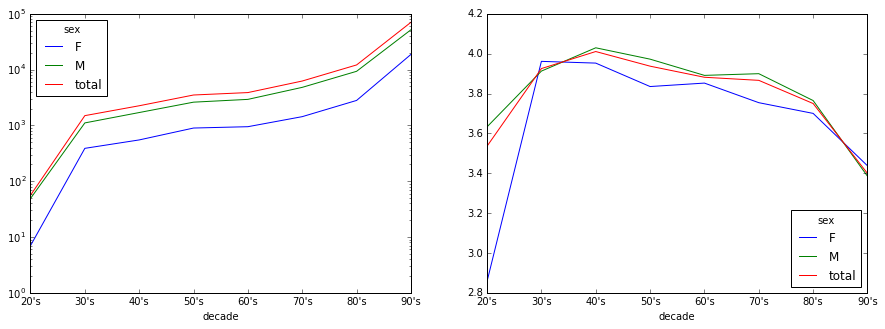

In [261]:
f, a = plt.subplots(1,2)
prefered_decade_by_sex['idx'].plot(ax=a[0], figsize=(15,5), logy=True)
prefered_decade_by_sex['rating'].plot(ax=a[1], figsize=(15,5))
# It seems that women don't like movies from the 20's (but if you take at the number 
# of votes there are too few women that have voted for 20's movies. Also, the best
# reviews seem to be for movies of 30's and 40's and (as expected) the most revies
# are for newest movies

Let's try another quick `pivot_table`. Can we see if there's a specific day-of-week at which the reviewers prefer to vote? 

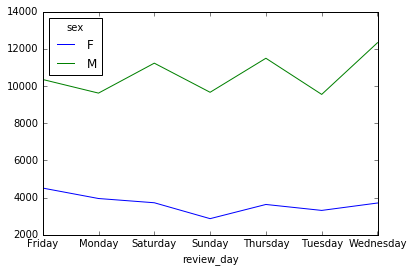

In [262]:
final_lens.pivot_table(
    index=['review_day'],
    columns=['sex'],
    values='idx',
    aggfunc=len
).plot()

# Probably not

Continuing our exploration of the movie-reviews data set, we'd like to get the total number of reviews and average rating for each movie. To make a better display for the release we'll categorise the movies by their decade and release year (using multi index rows):

In [263]:
rating_count = final_lens.pivot_table(
    index=[ 'decade', 'release_year', 'title',],
    values=['rating', 'idx', ],
    aggfunc={
        'rating': np.average,
        'idx': len,
        
    }
)
# Drop movies without decade
rating_count = rating_count.drop('')
rating_count.head(10)
# Notice the nice hierarchical index on decade and release_year

idx  \
decade release_year title                                                     
20's   1922         Nosferatu (Nosferatu, eine Symphonie des Grauen...   54   
       1926         Scarlet Letter, The (1926)                            2   
30's   1930         Blue Angel, The (Blaue Engel, Der) (1930)            18   
       1931         M (1931)                                             44   
       1932         Farewell to Arms, A (1932)                           12   
       1933         Duck Soup (1933)                                     93   
                    Liebelei (1933)                                       1   
       1934         Gay Divorcee, The (1934)                             15   
                    It Happened One Night (1934)                         81   
                    Of Human Bondage (1934)                               5   

                                                                          rating  
decade release_year title                                                         
20's   1922         Nosferatu (Nosferatu, eine Symphonie des Grauen...  3.555556  
       1926         Scarlet Letter, The (1926)                          3.000000  
30's   1930         Blue Angel, The (Blaue Engel, Der) (1930)           3.777778  
       1931         M (1931)                                            4.000000  
       1932         Farewell to Arms, A (1932)                          3.833333  
       1933         Duck Soup (1933)                                    4.000000  
                    Liebelei (1933)                                     1.000000  
       1934         Gay Divorcee, The (1934)                            3.866667  
                    It Happened One Night (1934)                        4.012346  
                    Of Human Bondage (1934)                             3.200000

As we can see above, there are movies with very few revies. I don't really want to count them since they'll probably won't have correct ratings. Also, instead of displaying all the movies I'd like to create a small list with only the best movies:

In [264]:
# So, let's find the best movies (rating more than 4) with more than 150 reviews
best_movies = rating_count[(rating_count.idx>150) & (rating_count.rating>4)]
best_movies

idx  \
decade release_year title                                                     
30's   1939         Wizard of Oz, The (1939)                            246   
40's   1941         Citizen Kane (1941)                                 198   
       1942         Casablanca (1942)                                   243   
       1946         It's a Wonderful Life (1946)                        231   
50's   1951         African Queen, The (1951)                           152   
       1954         Rear Window (1954)                                  209   
       1957         Bridge on the River Kwai, The (1957)                165   
       1958         Vertigo (1958)                                      179   
       1959         North by Northwest (1959)                           179   
60's   1960         Psycho (1960)                                       239   
       1962         Lawrence of Arabia (1962)                           173   
                    To Kill a Mockingbird (1962)                        219   
       1963         Dr. Strangelove or: How I Learned to Stop Worry...  194   
       1967         Graduate, The (1967)                                239   
70's   1972         Godfather, The (1972)                               413   
       1973         Sting, The (1973)                                   241   
       1974         Godfather: Part II, The (1974)                      209   
                    Monty Python and the Holy Grail (1974)              316   
       1975         One Flew Over the Cuckoo's Nest (1975)              264   
       1977         Star Wars (1977)                                    583   
       1979         Alien (1979)                                        291   
                    Apocalypse Now (1979)                               221   
80's   1980         Empire Strikes Back, The (1980)                     367   
       1981         Raiders of the Lost Ark (1981)                      420   
       1982         Blade Runner (1982)                                 275   
                    Gandhi (1982)                                       195   
       1984         Amadeus (1984)                                      276   
       1987         Princess Bride, The (1987)                          324   
       1989         Glory (1989)                                        171   
90's   1991         Silence of the Lambs, The (1991)                    390   
                    Terminator 2: Judgment Day (1991)                   295   
       1993         Fugitive, The (1993)                                336   
                    Much Ado About Nothing (1993)                       176   
                    Schindler's List (1993)                             298   
       1994         Pulp Fiction (1994)                                 394   
                    Shawshank Redemption, The (1994)                    283   
       1995         Sense and Sensibility (1995)                        268   
                    Usual Suspects, The (1995)                          267   
       1996         Braveheart (1995)                                   297   
                    Lone Star (1996)                                    187   
                    Secrets & Lies (1996)                               162   
                    Taxi Driver (1976)                                  182   
       1997         Boot, Das (1981)                                    201   
                    Fargo (1996)                                        508   
                    Good Will Hunting (1997)                            198   
                    L.A. Confidential (1997)                            297   
                    Return of the Jedi (1983)                           507   
                    Titanic (1997)                                      350   
       1998         Apt Pupil (1998)                                    160   

                                          

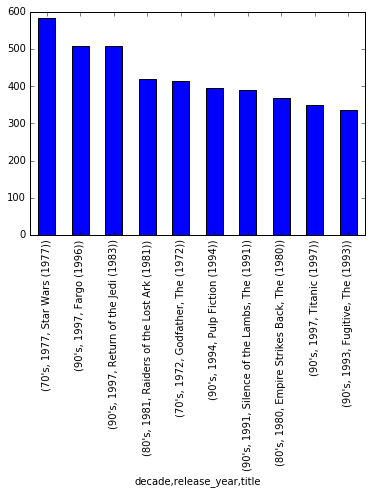

In [265]:
# Which are the most popular movies (number of votes) ?
best_movies.sort_values(by='idx', ascending=False)['idx'][:10].plot(kind='bar')

# Fargo at the 2nd and Fugitive at the 10nth place of popularity seem a little strange to mee

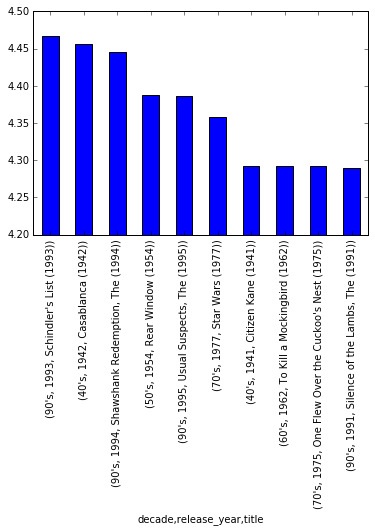

In [266]:
# Which are the best movies (vote average) ?
best_movies.sort_values(by='rating', ascending=False)['rating'][:10].plot(kind='bar', ylim=(4.2,4.5))

# I tend to agree with most of them, however I feel that the Godfather is missing...

Let's try to see how many people of each age are voting, however instead of displaying the votes for people of each specific age, we'll seperate the ages into groups (0-10, 10,20 etc) and dispaly the counts for them:

In [267]:
review_idx_by_age = final_lens.pivot_table(index=['age'], values='idx', aggfunc=len)
print review_idx_by_age.head(10)

# Let's group by age group
def by_age(x):
    return '{0}-{1}'.format((x/10)*10, (x/10 + 1)*10)


grouped_review_idx = review_idx_by_age.groupby(by_age).aggregate(sum)
grouped_review_idx

age
7       43
10      31
11      27
13     497
14     264
15     397
16     335
17     897
18    2219
19    3514
Name: idx, dtype: int64


0-10        43
10-20     8181
20-30    39535
30-40    25696
40-50    15021
50-60     8704
60-70     2623
70-80      197
Name: idx, dtype: int64

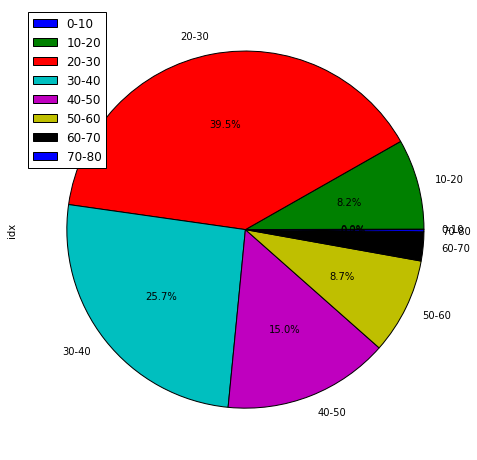

In [268]:
# Let's plot our number of votes - we can see that most people voting are 20-30
grouped_review_idx.plot(kind='pie', figsize=(8, 8), legend=True, autopct='%1.1f%%', fontsize=10 )

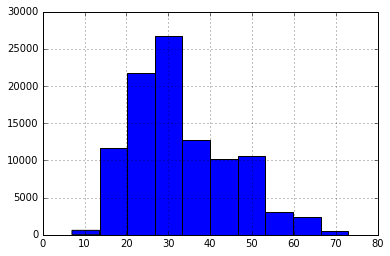

In [269]:
# We can also see the same (more or less) info directly from the
# initial dataset, using a histogram
final_lens['age'].hist(bins=10)

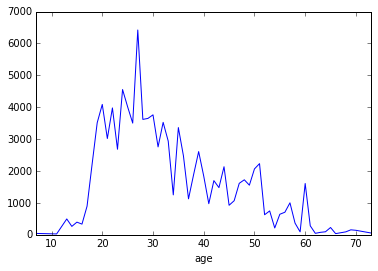

In [270]:
# Or just by plotting the num of reviews / age (not the grouped one)
review_idx_by_age.plot()

Let's see how people of each occupation and sex are voting. We'll get the averages for age, and rating and total number of reviews:

In [271]:
aggrs = {'age': np.average, 'idx': len, 'rating' :np.average}
# This creeates a dataframe for men and women
d1 = final_lens.pivot_table(index='occupation', columns='sex', aggfunc=aggrs)
# This creates a dataframe for both
d2 = final_lens.pivot_table(index='occupation', aggfunc=aggrs)
# Let's put the values from the "both" dataframe to the men/women dataframe
d1[ 'idx','Total' ] = d2['idx']
d1[ 'age','Total'] = d2['age']
d1[ 'rating','Total'] = d2['rating']
# And now let's sort the row index so that it will have the correct multiindex
occupations = d1.sort_index(axis=1)
# Finally, let's sort the DataFrame by the total number of votes for each occupation
occupations = occupations.sort_values( ('idx', 'Total'), ascending=False )
occupations
# Students are no1 - not a surpise!

age                           idx                  \
sex                    F          M      Total       F        M  Total   
occupation                                                               
student        21.092697  22.510731  22.142870  5696.0  16261.0  21957   
other          31.813370  32.964704  32.568977  3665.0   6998.0  10663   
educator       37.942058  44.570167  42.789240  2537.0   6905.0   9442   
engineer       33.489655  34.371731  34.356086   145.0   8030.0   8175   
programmer     32.463007  32.502167  32.500064   419.0   7382.0   7801   
administrator  38.096081  39.688083  39.123145  2654.0   4825.0   7479   
writer         37.429848  32.219527  34.325867  2238.0   3298.0   5536   
librarian      36.707343  38.129300  37.358050  2860.0   2413.0   5273   
technician     38.000000  31.512655  31.712493   108.0   3398.0   3506   
executive      42.529412  36.203331  36.614164   221.0   3182.0   3403   
healthcare     37.644993  44.641851  38.885164  2307.0    497.0   2804   
artist         27.155510  33.088257  30.592288   971.0   1337.0   2308   
entertainment  27.546667  28.912834  28.766110   225.0   1870.0   2095   
scientist      28.273381  35.855133  35.343052   139.0   1919.0   2058   
marketing      32.106335  37.759947  36.478462   442.0   1508.0   1950   
retired        70.000000  61.375163  61.755749    71.0   1538.0   1609   
lawyer         36.000000  34.478056  34.556134    69.0   1276.0   1345   
none           33.887671  18.960821  25.007769   365.0    536.0    901   
salesman       31.318584  34.882012  33.470794   339.0    517.0    856   
doctor               NaN  35.592593  35.592593     NaN    540.0    540   
homemaker      33.416357  23.000000  32.371237   269.0     30.0    299   

                 rating                      
sex                   F         M     Total  
occupation                                   
student        3.602879  3.484411  3.515143  
other          3.531241  3.563447  3.552377  
educator       3.698857  3.660246  3.670621  
engineer       3.751724  3.537609  3.541407  
programmer     3.577566  3.567732  3.568260  
administrator  3.781839  3.555233  3.635646  
writer         3.663986  3.180109  3.375723  
librarian      3.580070  3.537920  3.560781  
technician     3.268519  3.540612  3.532230  
executive      3.773756  3.319610  3.349104  
healthcare     2.736021  3.639839  2.896220  
artist         3.347065  3.875841  3.653380  
entertainment  3.448889  3.440107  3.441050  
scientist      3.251799  3.637311  3.611273  
marketing      3.522624  3.474801  3.485641  
retired        3.239437  3.477243  3.466750  
lawyer         3.623188  3.741379  3.735316  
none           3.632877  3.878731  3.779134  
salesman       3.870206  3.394584  3.582944  
doctor              NaN  3.688889  3.688889  
homemaker      3.278810  3.500000  3.301003

Let's manipulate the previous DataFrame to take a look at only the occupations that have voted the most number of times. Actually, we'll get only occupations that have voted more than 6000 times, all other occupations we'll just add them to the "other" occupation. For this, we'll get only the `'idx'` column and filter it by the rows which have a `Total<6000`. We'll then take the sum for this DataFrame so that we'll get the total votes for each male/female and total. 

Next, we'll add this to the "other" row of the dataframe and remove the less than 6000 rows from it. Finally, we'll plot the resulting DataFrame for all male, female and both.

sex
F        10624.0
M        23859.0
Total    34483.0
dtype: float64
sex
F        14289.0
M        30857.0
Total    45146.0
Name: other, dtype: float64
sex                  F        M    Total
occupation                              
student         5696.0  16261.0  21957.0
other          14289.0  30857.0  45146.0
educator        2537.0   6905.0   9442.0
engineer         145.0   8030.0   8175.0
programmer       419.0   7382.0   7801.0
administrator   2654.0   4825.0   7479.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x2179D090>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x18D0E0D0>], dtype=object)

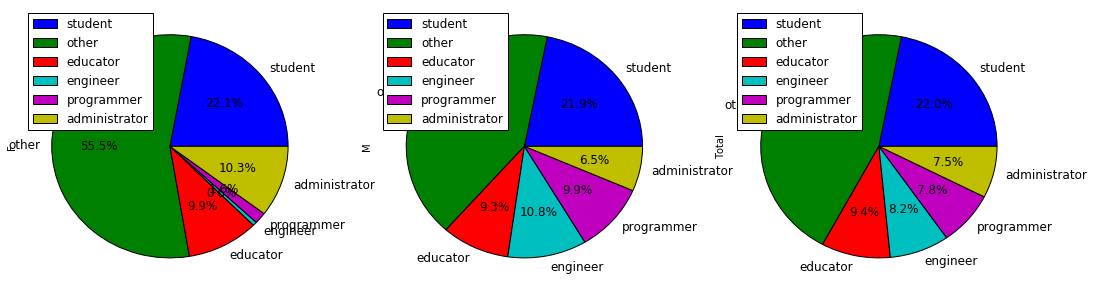

In [272]:
occupations_num = occupations['idx']
# Let's see which are the total numbers we need to add to "other"
add_to_other = occupations_num[occupations_num['Total']<6000].sum()
print add_to_other

occupations_num.loc['other']+=add_to_other
print occupations_num.loc['other']

# Now let's get the rows that have a total of > 6000
most_voters_with_other = occupations_num[occupations_num['Total']>6000]
print most_voters_with_other
most_voters_with_other.plot(kind='pie', subplots=True, figsize=(18,5 ), legend=True, autopct='%1.1f%%', fontsize=12)


Conclusion
==========

In the previous, I have tried to present a comprehensive introduction of the `pivot_table` command along with a small introduction to the pandas data structures (`Series` and `DataFrame`) and a bunch of other methods that will help in using `pivot_table` presenting both toy and real world examples for all of them. If you feel that something is missing or you want me to add another example pivot_table operation for either the books or the movie lens dataset feel free to tell me in the comments.

I hope that after reading (and understanding) the above you'll be able to use pandas and `pivot_table` without problems!